Import der notwendigen Bibliotheken

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datensatz einlesen

In [107]:
df = pd.read_csv('Dataset_Ads.csv')

print(df)

      Age  Gender    Income  Location Ad Type    Ad Topic   Ad Placement  \
0      61    Male  35717.43     Urban  Banner      Travel   Social Media   
1      41    Male  47453.25     Rural   Video      Travel  Search Engine   
2      49  Female  68126.35     Rural    Text        Food   Social Media   
3      68  Female  64585.73  Suburban    Text      Health        Website   
4      63    Male  21109.40     Urban  Native     Fashion  Search Engine   
...   ...     ...       ...       ...     ...         ...            ...   
9995    7    Male  69925.29     Rural    Text     Fashion   Social Media   
9996   35    Male  42182.75     Urban  Native  Technology        Website   
9997   42    Male  55084.12  Suburban    Text     Finance  Search Engine   
9998   34    Male  39382.80     Rural  Native  Technology   Social Media   
9999   54  Female  66441.59  Suburban  Banner  Technology  Search Engine   

      Clicks                  Click Time  Conversion Rate     CTR  
0          3  2024-

Spaltenumbennenung zur Vergleichbarkeit

In [108]:
df.rename(columns={'Conversion Rate': 'ConversionRate', 'Ad Placement': 'CampaignChannel'}, inplace=True)
print(df.columns)

Index(['Age', 'Gender', 'Income', 'Location', 'Ad Type', 'Ad Topic',
       'CampaignChannel', 'Clicks', 'Click Time', 'ConversionRate', 'CTR'],
      dtype='object')


Ausgabe der ersten fünf Zeilen des Datensatzes

In [109]:
print("Datenvorschau:")
print(df.head())

Datenvorschau:
   Age  Gender    Income  Location Ad Type Ad Topic CampaignChannel  Clicks  \
0   61    Male  35717.43     Urban  Banner   Travel    Social Media       3   
1   41    Male  47453.25     Rural   Video   Travel   Search Engine       5   
2   49  Female  68126.35     Rural    Text     Food    Social Media       4   
3   68  Female  64585.73  Suburban    Text   Health         Website       6   
4   63    Male  21109.40     Urban  Native  Fashion   Search Engine       5   

                   Click Time  ConversionRate     CTR  
0  2024-01-18 20:45:56.898459          0.0981  0.0737  
1  2023-04-24 20:45:56.898459          0.0937  0.0592  
2  2024-02-24 20:45:56.898459          0.1912  0.0563  
3  2023-12-13 20:45:56.898459          0.1122  0.0232  
4  2023-07-02 20:45:56.898459          0.1426  0.0539  


Grundlegende Informationen über den Datensatz

In [110]:
print("Grundlegende Informationen:")
print(df.info())

Grundlegende Informationen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Income           10000 non-null  float64
 3   Location         10000 non-null  object 
 4   Ad Type          10000 non-null  object 
 5   Ad Topic         10000 non-null  object 
 6   CampaignChannel  10000 non-null  object 
 7   Clicks           10000 non-null  int64  
 8   Click Time       10000 non-null  object 
 9   ConversionRate   10000 non-null  float64
 10  CTR              10000 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.5+ KB
None


Überblick über den Datensatz

In [111]:
overview = {
    'shape': df.shape,
    'columns': df.columns.tolist(),
    'dtypes': df.dtypes.to_dict(),
    'missing_values': df.isnull().sum().to_dict()
}

print("Überblick über den Datensatz:")
print(overview)

Überblick über den Datensatz:
{'shape': (10000, 11), 'columns': ['Age', 'Gender', 'Income', 'Location', 'Ad Type', 'Ad Topic', 'CampaignChannel', 'Clicks', 'Click Time', 'ConversionRate', 'CTR'], 'dtypes': {'Age': dtype('int64'), 'Gender': dtype('O'), 'Income': dtype('float64'), 'Location': dtype('O'), 'Ad Type': dtype('O'), 'Ad Topic': dtype('O'), 'CampaignChannel': dtype('O'), 'Clicks': dtype('int64'), 'Click Time': dtype('O'), 'ConversionRate': dtype('float64'), 'CTR': dtype('float64')}, 'missing_values': {'Age': 0, 'Gender': 0, 'Income': 0, 'Location': 0, 'Ad Type': 0, 'Ad Topic': 0, 'CampaignChannel': 0, 'Clicks': 0, 'Click Time': 0, 'ConversionRate': 0, 'CTR': 0}}


Statistische Zusammenfassung aller Spalten

In [112]:
description = df.describe(include='all')

print("Statistische Zusammenfassung aller Spalten:")
print(description)

Statistische Zusammenfassung aller Spalten:
                 Age Gender         Income Location Ad Type Ad Topic  \
count   10000.000000  10000   10000.000000    10000   10000    10000   
unique           NaN      3            NaN        3       4        6   
top              NaN   Male            NaN    Rural  Banner  Finance   
freq             NaN   4986            NaN     3408    2560     1734   
mean       34.235200    NaN   50080.040922      NaN     NaN      NaN   
std        14.790752    NaN   19935.832667      NaN     NaN      NaN   
min       -21.000000    NaN  -38932.640000      NaN     NaN      NaN   
25%        24.000000    NaN   36892.040000      NaN     NaN      NaN   
50%        34.000000    NaN   50122.520000      NaN     NaN      NaN   
75%        44.000000    NaN   63271.342500      NaN     NaN      NaN   
max        92.000000    NaN  126635.800000      NaN     NaN      NaN   

       CampaignChannel        Clicks                  Click Time  \
count            10000 

Statistische Zusammenfassung der numerischen Spalten

In [113]:
print("Statistische Zusammenfassung der numerischen Spalten:")
print(df.describe())

Statistische Zusammenfassung der numerischen Spalten:
                Age         Income        Clicks  ConversionRate           CTR
count  10000.000000   10000.000000  10000.000000    10000.000000  10000.000000
mean      34.235200   50080.040922      5.030600        0.202246      0.050425
std       14.790752   19935.832667      2.258046        0.121094      0.019821
min      -21.000000  -38932.640000      0.000000        0.001000      0.000000
25%       24.000000   36892.040000      3.000000        0.109500      0.037100
50%       34.000000   50122.520000      5.000000        0.180650      0.050300
75%       44.000000   63271.342500      6.000000        0.275100      0.063700
max       92.000000  126635.800000     17.000000        0.731700      0.127200


Überprüfen auf fehlende Werte

In [114]:
missing_values = df.isnull().sum()
print("Fehlende Werte:")
print(missing_values)

Fehlende Werte:
Age                0
Gender             0
Income             0
Location           0
Ad Type            0
Ad Topic           0
CampaignChannel    0
Clicks             0
Click Time         0
ConversionRate     0
CTR                0
dtype: int64


Prüfen auf doppelte Einträge

In [115]:
duplicate_records = df[df.duplicated()]

print(f"Anzahl der doppelten Einträge: {duplicate_records.shape[0]}")

print("Doppelte Einträge:")
print(duplicate_records)

Anzahl der doppelten Einträge: 0
Doppelte Einträge:
Empty DataFrame
Columns: [Age, Gender, Income, Location, Ad Type, Ad Topic, CampaignChannel, Clicks, Click Time, ConversionRate, CTR]
Index: []


Gruppierte Ausgabe aller Spalten von 'df' 

In [116]:
for column in df.columns:
    grouped = df.groupby(column).size().reset_index(name='Count')
    print(f"Gruppierte Ausgabe für Spalte: {column}")
    print(grouped)
    print("\n")

Gruppierte Ausgabe für Spalte: Age
    Age  Count
0   -21      1
1   -15      1
2   -11      3
3   -10      4
4    -9      4
..  ...    ...
95   82      1
96   83      1
97   84      2
98   86      1
99   92      1

[100 rows x 2 columns]


Gruppierte Ausgabe für Spalte: Gender
   Gender  Count
0  Female   3962
1    Male   4986
2   Other   1052


Gruppierte Ausgabe für Spalte: Income
         Income  Count
0     -38932.64      1
1     -21037.11      1
2     -20517.80      1
3     -19790.61      1
4     -18644.31      1
...         ...    ...
9989  117209.17      1
9990  118241.39      1
9991  122113.17      1
9992  122722.03      1
9993  126635.80      1

[9994 rows x 2 columns]


Gruppierte Ausgabe für Spalte: Location
   Location  Count
0     Rural   3408
1  Suburban   3307
2     Urban   3285


Gruppierte Ausgabe für Spalte: Ad Type
  Ad Type  Count
0  Banner   2560
1  Native   2465
2    Text   2464
3   Video   2511


Gruppierte Ausgabe für Spalte: Ad Topic
     Ad Topic  Count
0    

Entferne Zeilen mit Werten >= 18 in der Spalte 'Age'

In [117]:
df = df[df['Age'] >= 18]

print("Datensatz nach Entfernen negativer Werte in der Spalte 'Age':")
print(df)

Datensatz nach Entfernen negativer Werte in der Spalte 'Age':
      Age  Gender    Income  Location Ad Type    Ad Topic CampaignChannel  \
0      61    Male  35717.43     Urban  Banner      Travel    Social Media   
1      41    Male  47453.25     Rural   Video      Travel   Search Engine   
2      49  Female  68126.35     Rural    Text        Food    Social Media   
3      68  Female  64585.73  Suburban    Text      Health         Website   
4      63    Male  21109.40     Urban  Native     Fashion   Search Engine   
...   ...     ...       ...       ...     ...         ...             ...   
9994   49  Female  72810.17     Rural  Banner  Technology         Website   
9996   35    Male  42182.75     Urban  Native  Technology         Website   
9997   42    Male  55084.12  Suburban    Text     Finance   Search Engine   
9998   34    Male  39382.80     Rural  Native  Technology    Social Media   
9999   54  Female  66441.59  Suburban  Banner  Technology   Search Engine   

      Clicks 

Definieren von Altersgruppen

In [118]:
# Altersgruppen definieren
bins = [17, 24, 34, 44, 54, 64, 74, 84, 94]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94']

# Neue Spalte 'GroupedAge' erstellen
df['GroupedAge'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print(df[['Age', 'GroupedAge']])
print(df[['Age', 'GroupedAge']].info())

      Age GroupedAge
0      61      55-64
1      41      35-44
2      49      45-54
3      68      65-74
4      63      55-64
...   ...        ...
9994   49      45-54
9996   35      35-44
9997   42      35-44
9998   34      25-34
9999   54      45-54

[8694 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 8694 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Age         8694 non-null   int64   
 1   GroupedAge  8694 non-null   category
dtypes: category(1), int64(1)
memory usage: 144.7 KB
None


Ausgabe des Grouped Dataframes

In [119]:
grouped_df = df[['GroupedAge', 'Gender', 'CampaignChannel', 'ConversionRate']]

print("Grouped DataFrame:")
print(grouped_df)

Grouped DataFrame:
     GroupedAge  Gender CampaignChannel  ConversionRate
0         55-64    Male    Social Media          0.0981
1         35-44    Male   Search Engine          0.0937
2         45-54  Female    Social Media          0.1912
3         65-74  Female         Website          0.1122
4         55-64    Male   Search Engine          0.1426
...         ...     ...             ...             ...
9994      45-54  Female         Website          0.0679
9996      35-44    Male         Website          0.2664
9997      35-44    Male   Search Engine          0.2354
9998      25-34    Male    Social Media          0.1725
9999      45-54  Female   Search Engine          0.0307

[8694 rows x 4 columns]


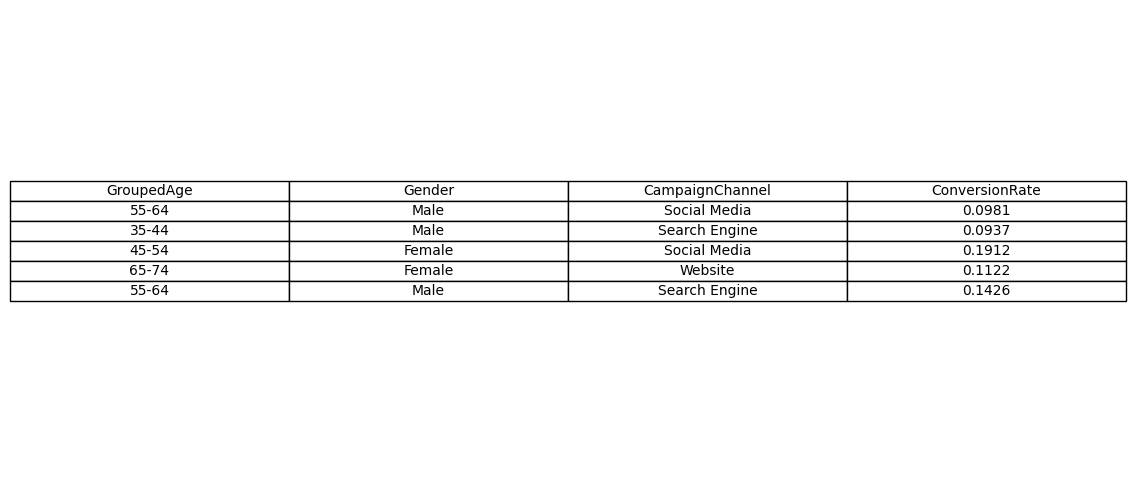

In [162]:
from matplotlib.backends.backend_pdf import PdfPages

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))  # Größe der Abbildung festlegen
ax.axis('tight')
ax.axis('off')

# Kopf des DataFrames in eine Tabelle konvertieren
table = ax.table(cellText=grouped_df.head().values, colLabels=grouped_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Bild anzeigen
plt.show()

# Tabelle als PDF speichern
with PdfPages('grouped_df_table.pdf') as pdf:
    pdf.savefig(fig)

Grundlegende Informationen über 'grouped_df'

In [120]:
print("Grundlegende Informationen des Grouped Dataframes:")
print(grouped_df.info())

Grundlegende Informationen des Grouped Dataframes:
<class 'pandas.core.frame.DataFrame'>
Index: 8694 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GroupedAge       8694 non-null   category
 1   Gender           8694 non-null   object  
 2   CampaignChannel  8694 non-null   object  
 3   ConversionRate   8694 non-null   float64 
dtypes: category(1), float64(1), object(2)
memory usage: 280.5+ KB
None


Statistische Zusammenfassung aller Spalten von 'grouped_df'

In [121]:
description = grouped_df.describe(include='all')

print("Statistische Zusammenfassung aller Spalten von grouped_df:")
print(description)

Statistische Zusammenfassung aller Spalten von grouped_df:
       GroupedAge Gender CampaignChannel  ConversionRate
count        8694   8694            8694     8694.000000
unique          8      3               3             NaN
top         25-34   Male   Search Engine             NaN
freq         2539   4316            2911             NaN
mean          NaN    NaN             NaN        0.202066
std           NaN    NaN             NaN        0.121292
min           NaN    NaN             NaN        0.001000
25%           NaN    NaN             NaN        0.108900
50%           NaN    NaN             NaN        0.180500
75%           NaN    NaN             NaN        0.275200
max           NaN    NaN             NaN        0.685200


Werteverteilung der Spalten 'GroupedAge', 'Gender' und 'CampaignChannel'

In [122]:
for column in ['GroupedAge', 'Gender', 'CampaignChannel']:
    print(f"Wertverteilung für Spalte: {column}")
    print(grouped_df[column].value_counts())
    print("\n")

Wertverteilung für Spalte: GroupedAge
GroupedAge
25-34    2539
35-44    2461
45-54    1560
18-24    1262
55-64     660
65-74     182
75-84      28
85-94       2
Name: count, dtype: int64


Wertverteilung für Spalte: Gender
Gender
Male      4316
Female    3462
Other      916
Name: count, dtype: int64


Wertverteilung für Spalte: CampaignChannel
CampaignChannel
Search Engine    2911
Social Media     2905
Website          2878
Name: count, dtype: int64




Visualisierung der Werteverteilung

C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\3618837297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grouped_df, x=column, palette='coolwarm')


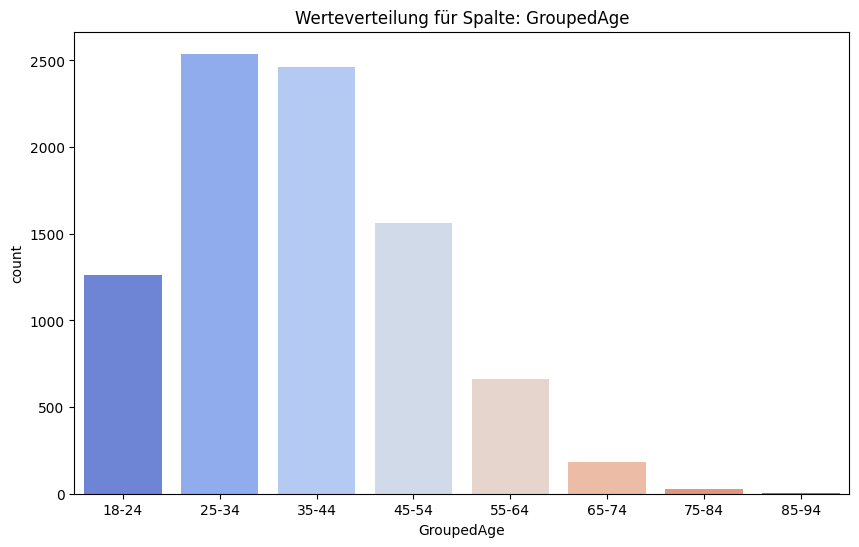

C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\3618837297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grouped_df, x=column, palette='coolwarm')


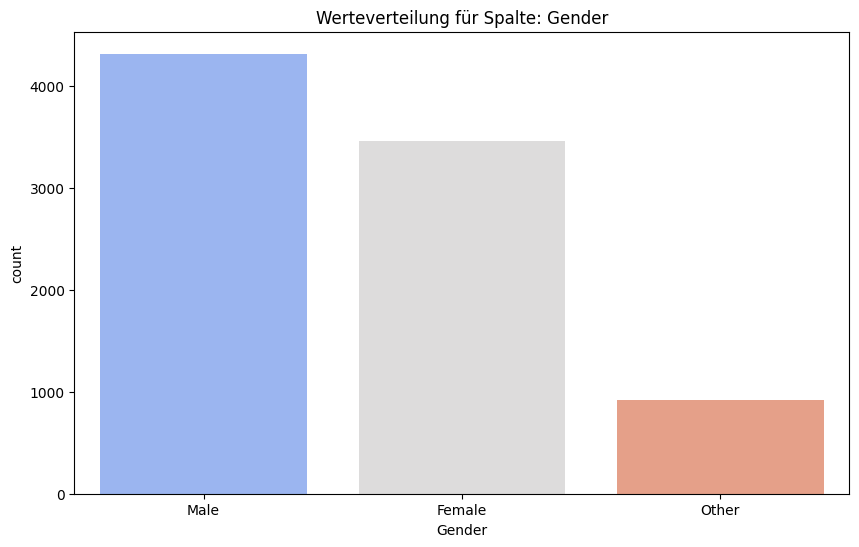

C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\3618837297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grouped_df, x=column, palette='coolwarm')


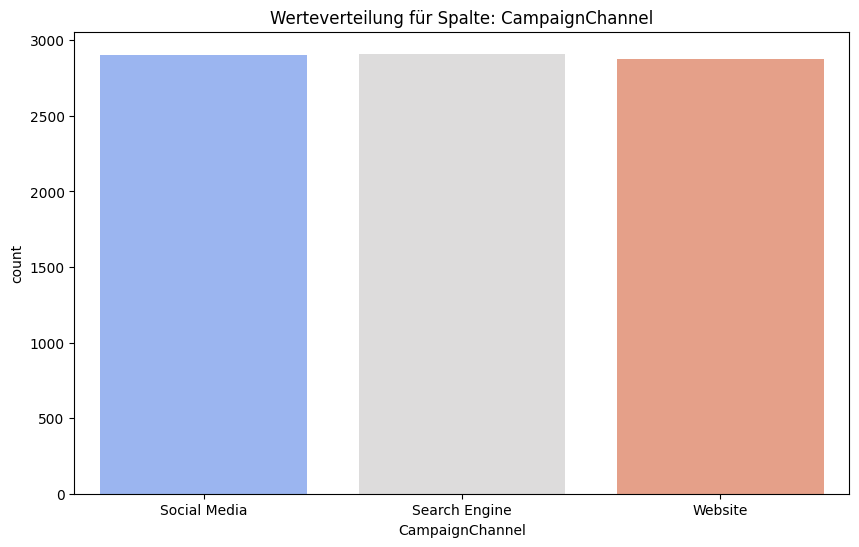

In [123]:
for column in ['GroupedAge', 'Gender', 'CampaignChannel']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=grouped_df, x=column, palette='coolwarm')
    plt.title(f'Werteverteilung für Spalte: {column}')
    plt.xticks(ha='center')
    plt.show()

Werteverteilung der Spalten 'GroupedAge', 'Gender' und 'CampaignChannel' in Prozent

In [124]:
for column in ['GroupedAge', 'Gender', 'CampaignChannel']:
    print(f"Wertverteilung in Prozent für Spalte: {column}")
    print(grouped_df[column].value_counts(normalize=True) * 100)
    print("\n")

Wertverteilung in Prozent für Spalte: GroupedAge
GroupedAge
25-34    29.204049
35-44    28.306878
45-54    17.943409
18-24    14.515758
55-64     7.591442
65-74     2.093398
75-84     0.322061
85-94     0.023004
Name: proportion, dtype: float64


Wertverteilung in Prozent für Spalte: Gender
Gender
Male      49.643432
Female    39.820566
Other     10.536002
Name: proportion, dtype: float64


Wertverteilung in Prozent für Spalte: CampaignChannel
CampaignChannel
Search Engine    33.482862
Social Media     33.413849
Website          33.103290
Name: proportion, dtype: float64




Visualisierung der Werteverteilung

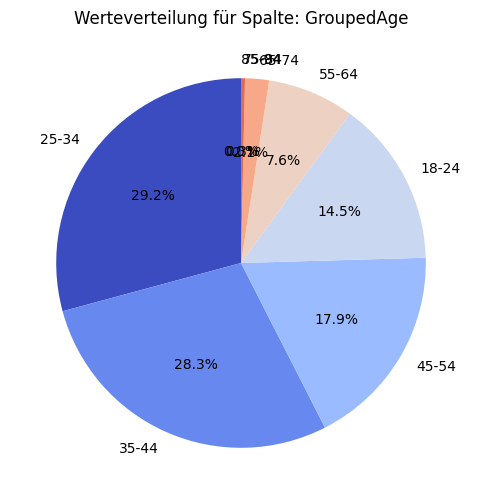

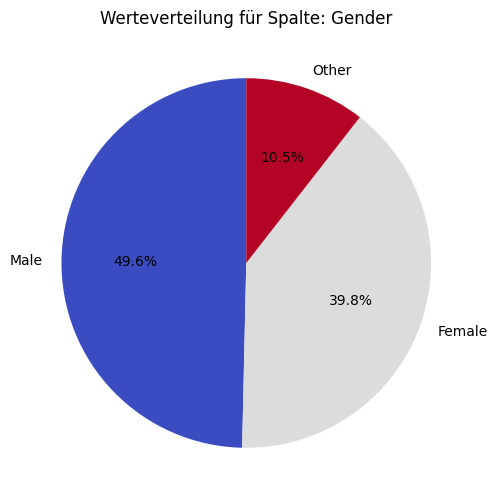

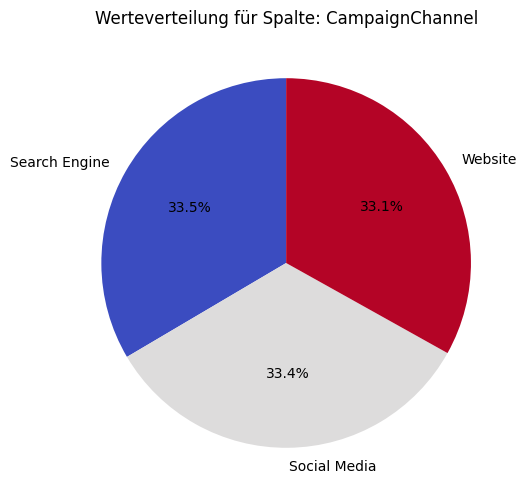

In [125]:
for column in ['GroupedAge', 'Gender', 'CampaignChannel']:
    plt.figure(figsize=(10, 6))
    grouped_df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')
    plt.title(f'Werteverteilung für Spalte: {column}')
    plt.ylabel('')
    plt.show()

Kontingenztabellen für die Spalten 'Gender', 'GroupedAge' und 'CampaignChannel' von 'grouped_df' in Absoluten Werten

In [126]:
combinations = [
    ('Gender', 'GroupedAge'),
    ('Gender', 'CampaignChannel'),
    ('GroupedAge', 'CampaignChannel'),
    ('Gender', 'GroupedAge', 'CampaignChannel')
]

for combination in combinations:
    kontingenztabelle = pd.crosstab(index=[grouped_df[col] for col in combination[:-1]], columns=grouped_df[combination[-1]])
    print(f"Kontingenztabelle für {' und '.join(combination)}:")
    print(kontingenztabelle)
    print("\n")

Kontingenztabelle für Gender und GroupedAge:
GroupedAge  18-24  25-34  35-44  45-54  55-64  65-74  75-84  85-94
Gender                                                            
Female        507    977    997    637    262     72      9      1
Male          635   1282   1190    773    332     90     13      1
Other         120    280    274    150     66     20      6      0


Kontingenztabelle für Gender und CampaignChannel:
CampaignChannel  Search Engine  Social Media  Website
Gender                                               
Female                    1135          1201     1126
Male                      1481          1405     1430
Other                      295           299      322


Kontingenztabelle für GroupedAge und CampaignChannel:
CampaignChannel  Search Engine  Social Media  Website
GroupedAge                                           
18-24                      441           392      429
25-34                      812           893      834
35-44                     

Visualisierung der Kontingenztabellen mit Balkendiagrammen 

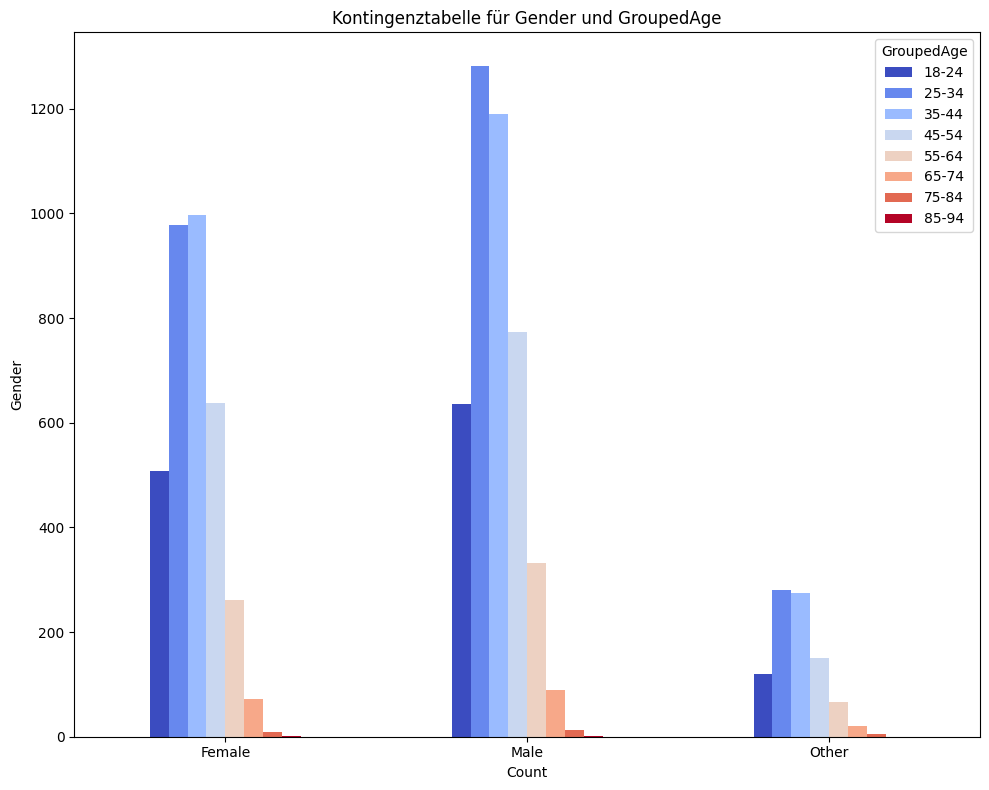

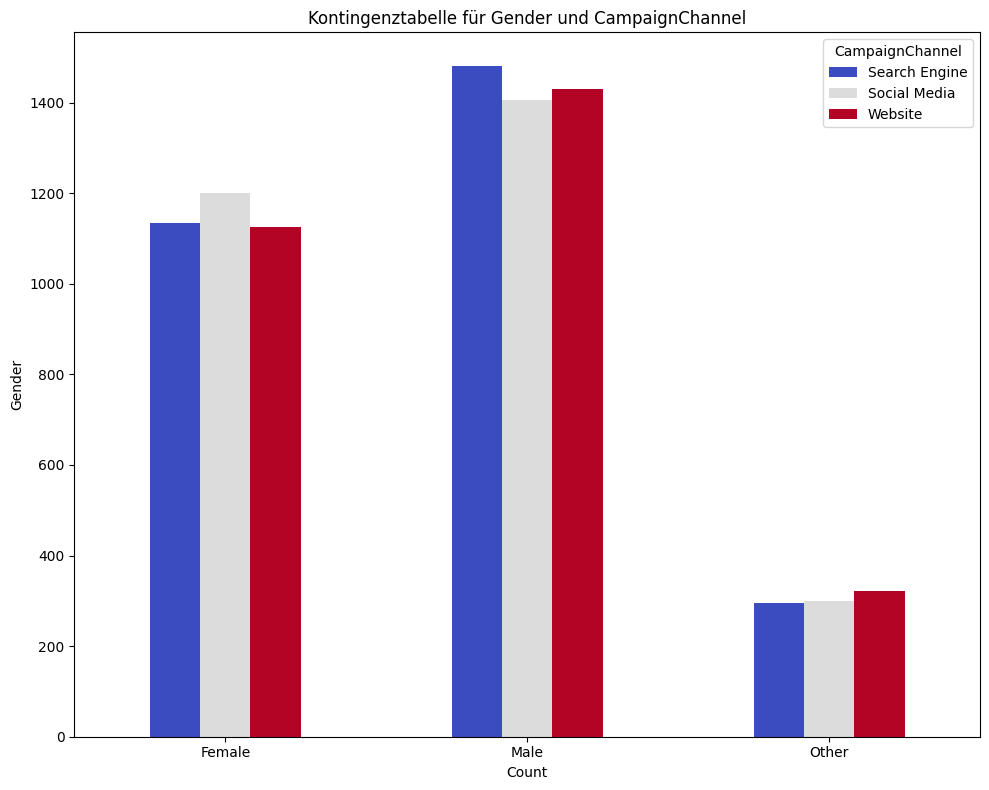

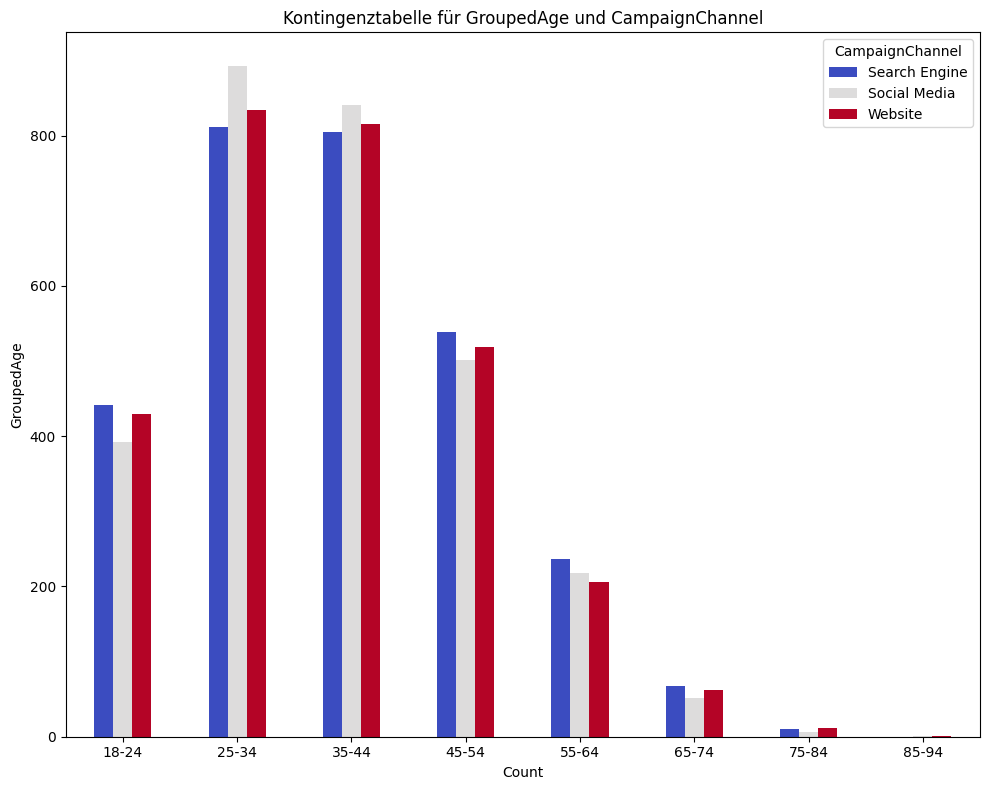

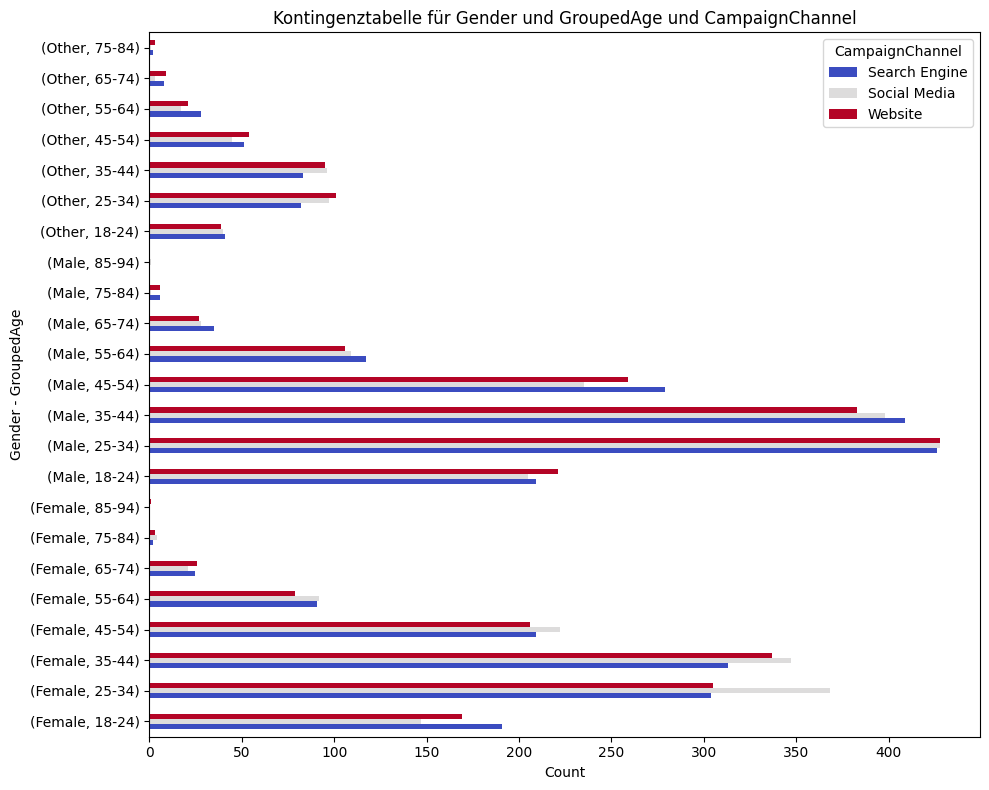

In [127]:
for combination in combinations:
    kontingenztabelle = pd.crosstab(index=[grouped_df[col] for col in combination[:-1]], columns=grouped_df[combination[-1]])
    if not kontingenztabelle.empty:
        if combination == combinations[-1]:
            ax = kontingenztabelle.plot(kind='barh', figsize=(10, 8), cmap='coolwarm')
            plt.title(f'Kontingenztabelle für {" und ".join(combination)}')
            plt.xlabel('Count')
            plt.ylabel(' - '.join(combination[:-1]))
            plt.xticks(rotation=0, ha='center')
            plt.tight_layout()
            plt.show()
        else:
            ax = kontingenztabelle.plot(kind='bar', figsize=(10, 8), cmap='coolwarm')
            plt.title(f'Kontingenztabelle für {" und ".join(combination)}')
            plt.xlabel('Count')
            plt.ylabel(' - '.join(combination[:-1]))
            plt.xticks(rotation=0, ha='center')
            plt.tight_layout()
            plt.show()

Kontingenztabellen für die Spalten 'Gender', 'GroupedAge' und 'CampaignChannel' von 'grouped_df' in Prozent

In [128]:
for combination in combinations:
    kontingenztabelle = pd.crosstab(index=[grouped_df[col] for col in combination[:-1]], columns=grouped_df[combination[-1]], normalize='index') * 100
    print(f"Kontingenztabelle in Prozent für {' und '.join(combination)}:")
    print(kontingenztabelle)
    print("\n")

Kontingenztabelle in Prozent für Gender und GroupedAge:
GroupedAge      18-24      25-34      35-44      45-54     55-64     65-74  \
Gender                                                                       
Female      14.644714  28.220682  28.798382  18.399769  7.567880  2.079723   
Male        14.712697  29.703429  27.571826  17.910102  7.692308  2.085264   
Other       13.100437  30.567686  29.912664  16.375546  7.205240  2.183406   

GroupedAge     75-84     85-94  
Gender                          
Female      0.259965  0.028885  
Male        0.301205  0.023170  
Other       0.655022  0.000000  


Kontingenztabelle in Prozent für Gender und CampaignChannel:
CampaignChannel  Search Engine  Social Media    Website
Gender                                                 
Female               32.784518     34.690930  32.524552
Male                 34.314180     32.553290  33.132530
Other                32.205240     32.641921  35.152838


Kontingenztabelle in Prozent für GroupedAge

Visualisierung der Kontingenztabellen mit Kreisdiagrammen 

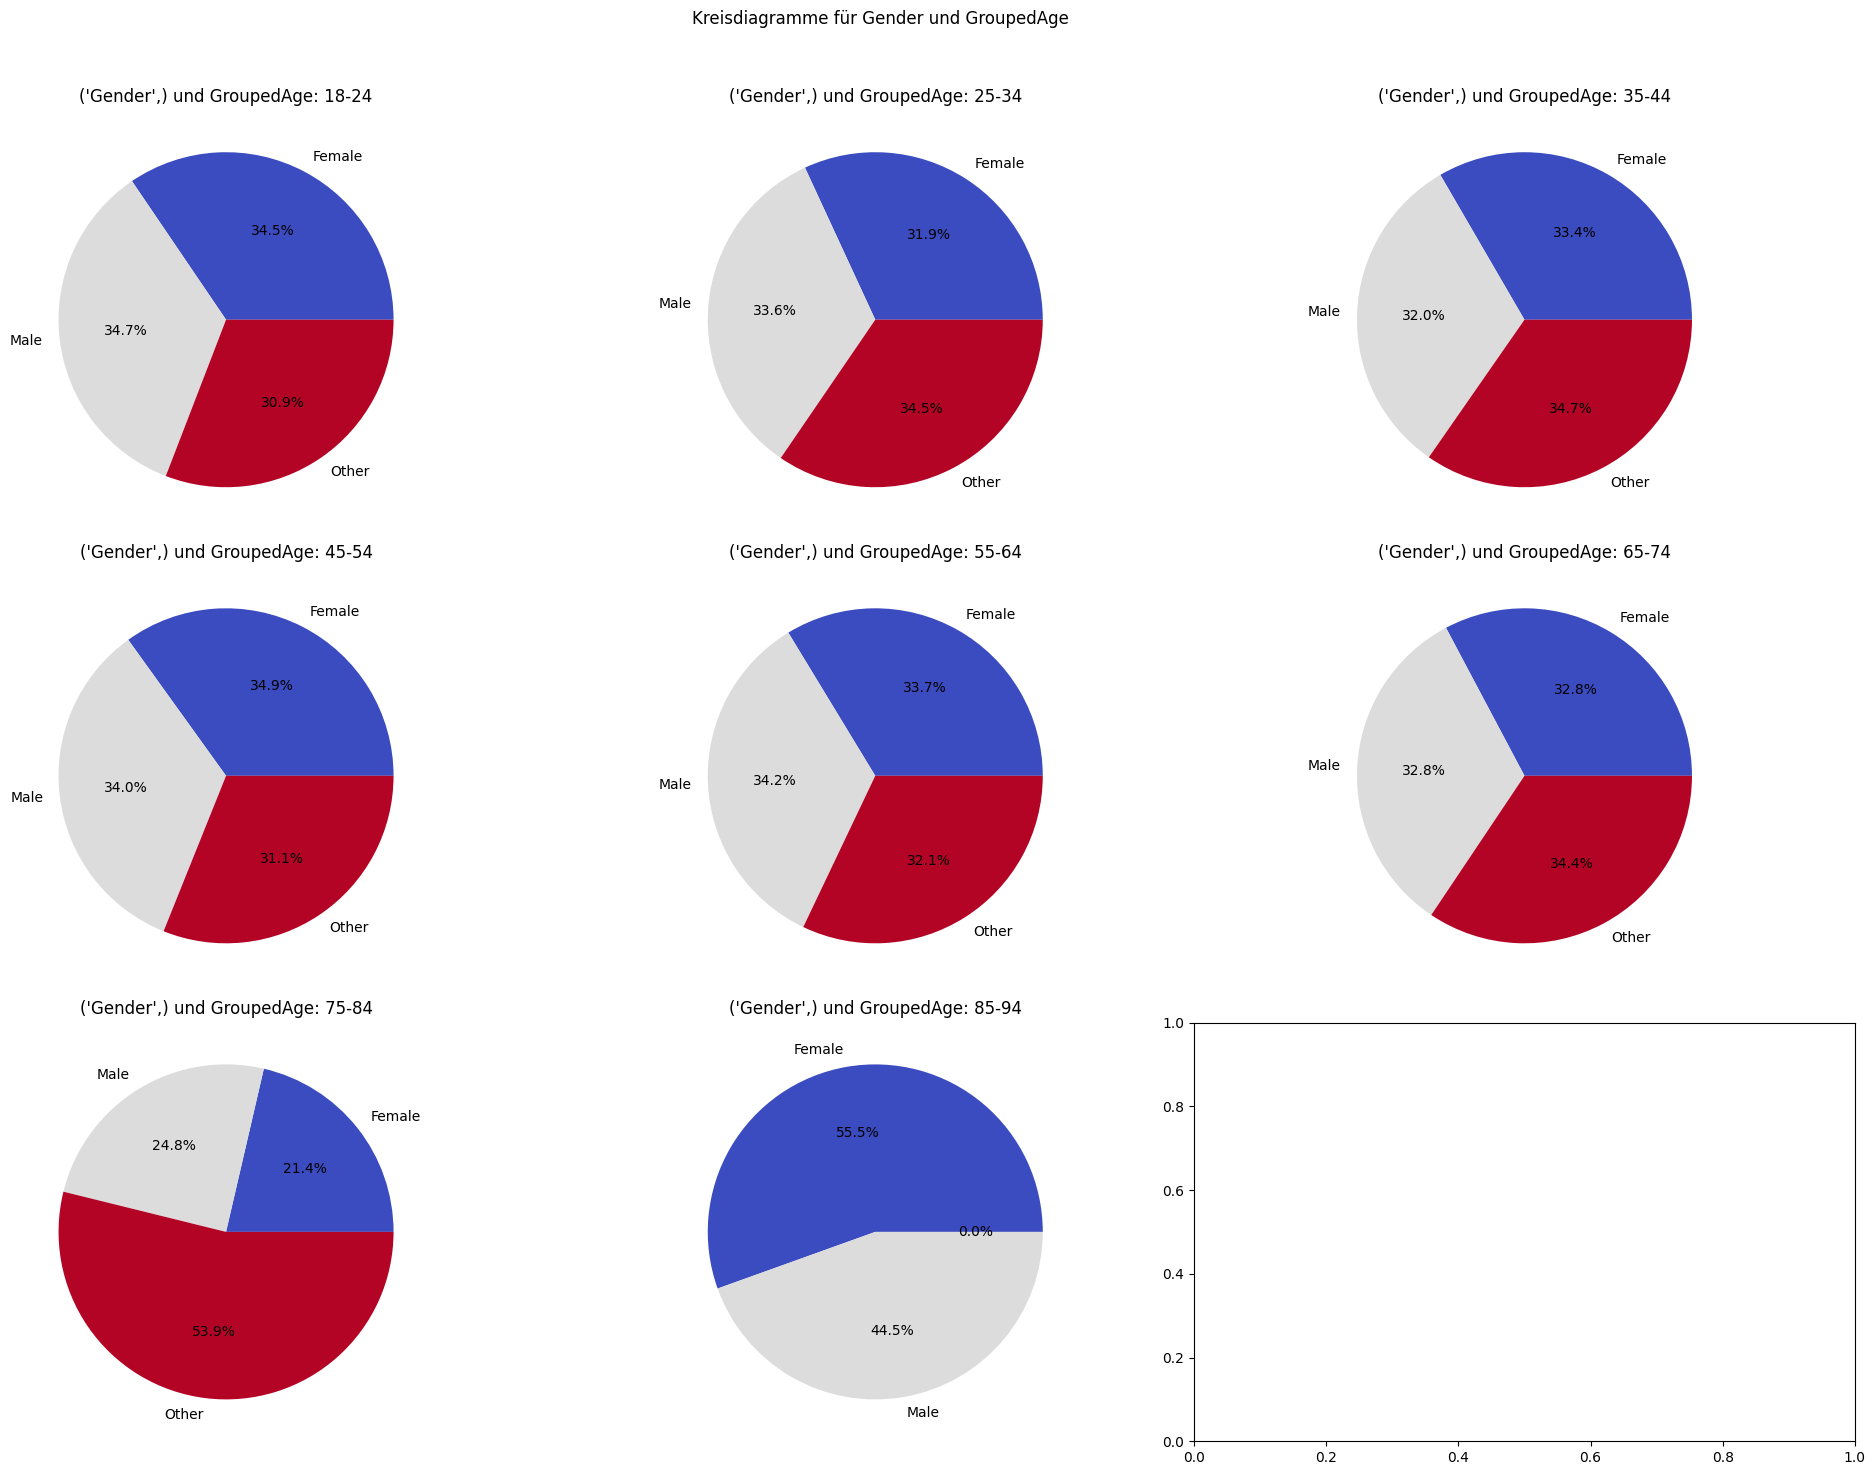

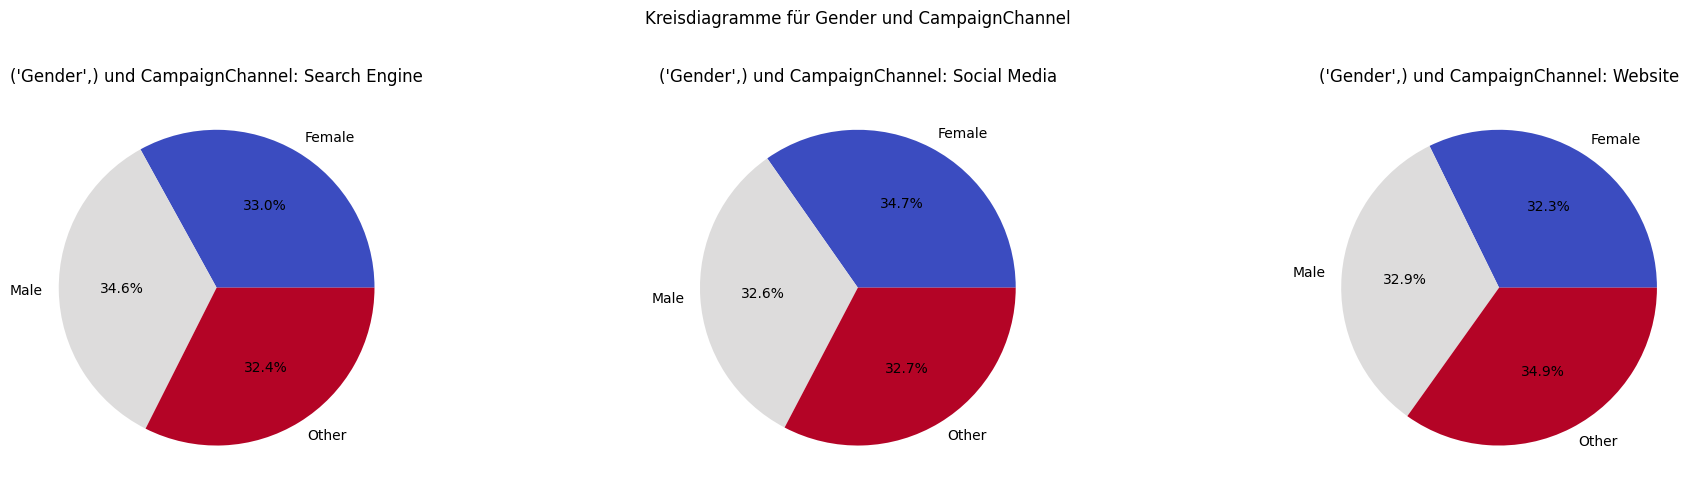

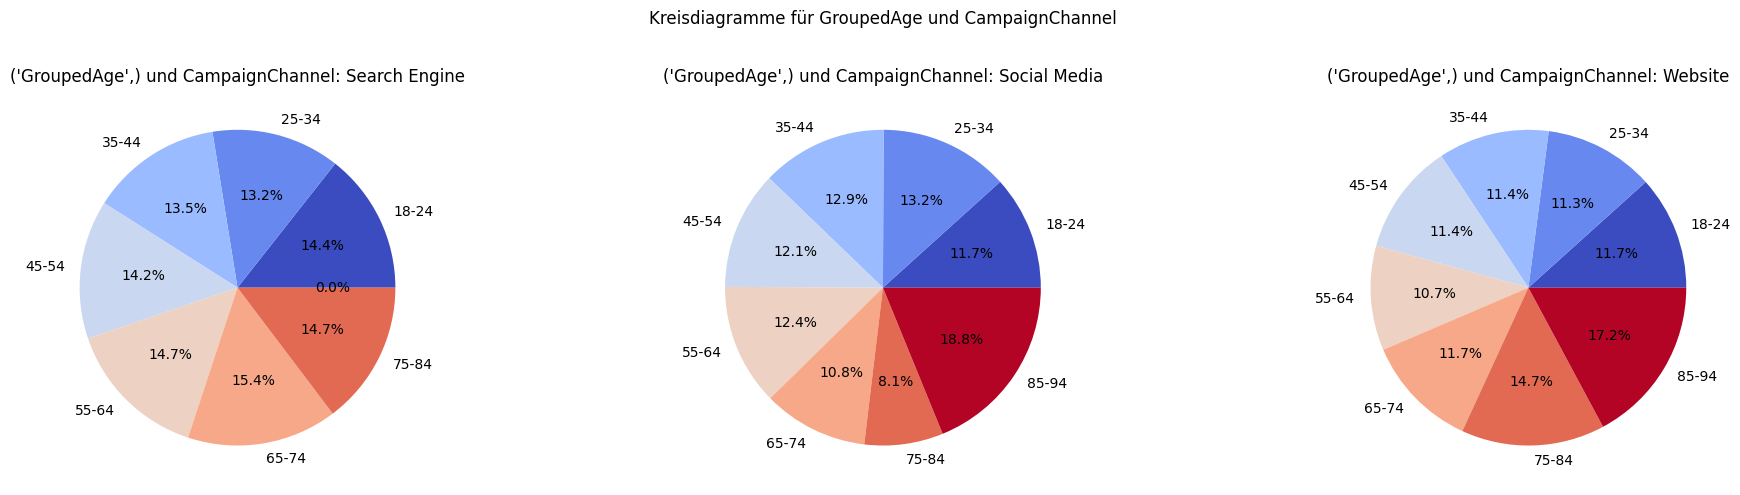

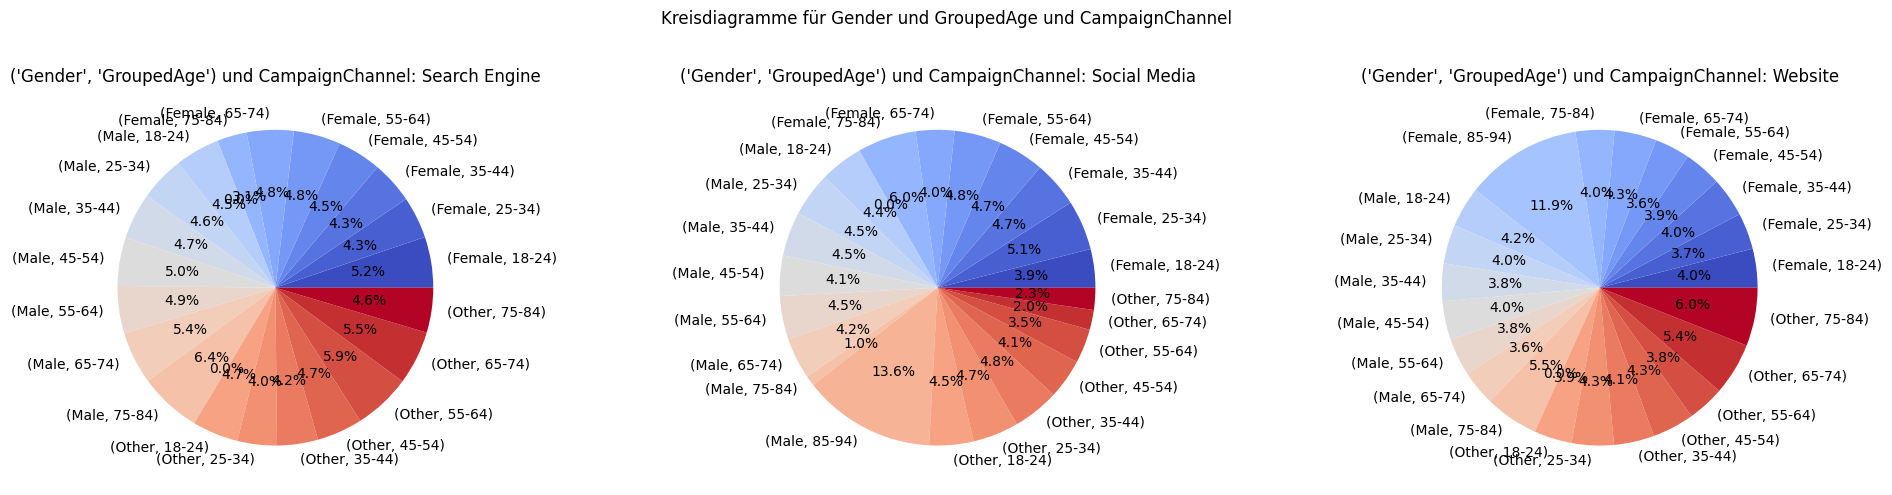

In [129]:
num_plots_per_row = 3

for combination in combinations:
    kontingenztabelle = pd.crosstab(index=[grouped_df[col] for col in combination[:-1]], columns=grouped_df[combination[-1]], normalize='index') * 100
    if not kontingenztabelle.empty:
        num_subplots = len(kontingenztabelle.columns)
        num_rows = (num_subplots // num_plots_per_row) + int(num_subplots % num_plots_per_row != 0)
        fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 5 * num_rows))
        axes = axes.flatten()
        
        for j, (col, ax) in enumerate(zip(kontingenztabelle.columns, axes)):
            kontingenztabelle[col].plot(kind='pie', ax=ax, autopct='%1.1f%%', legend=False, cmap='coolwarm')
            ax.set_ylabel('')
            ax.set_title(f'{combination[:-1]} und {combination[-1]}: {col}')
        
        plt.suptitle(f'Kreisdiagramme für {" und ".join(combination)}')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

Mittelwert und Median von 'ConversionRate'

In [130]:
mean_conversion_rate = df['ConversionRate'].mean()
median_conversion_rate = df['ConversionRate'].median()

print(f'Mean Conversion Rate: {mean_conversion_rate}')
print(f'Median Conversion Rate: {median_conversion_rate}')

Mean Conversion Rate: 0.20206636760984586
Median Conversion Rate: 0.1805


Boxplot der 'ConversionRate'

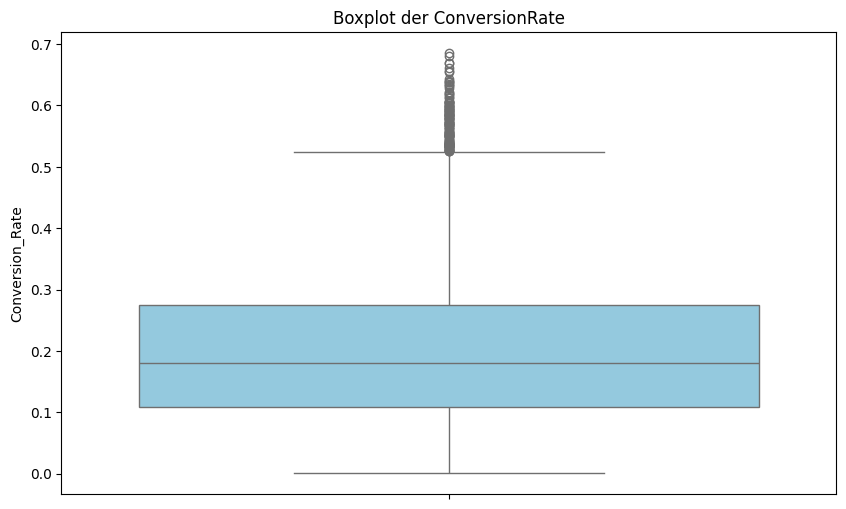

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['ConversionRate'], color='skyblue')

plt.title('Boxplot der ConversionRate')
plt.ylabel('Conversion_Rate')
plt.show()

Boxplot der 'ConversionRate' mit Mittelwert

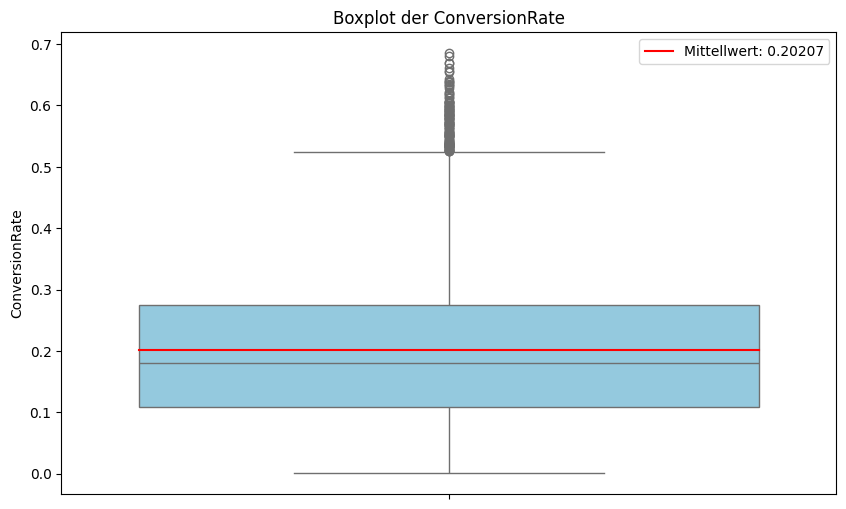

In [132]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['ConversionRate'], color='skyblue')

# Durchschnittslinie hinzufügen
mean_value = np.mean(df['ConversionRate'])
plt.axhline(mean_value, color='red', linestyle='-', xmin=0.1, xmax=0.9, label=f'Mittellwert: {mean_value:.5f}')

plt.title('Boxplot der ConversionRate')
plt.ylabel('ConversionRate')
plt.legend()
plt.show()

Verteilung der 'ConversionRate'

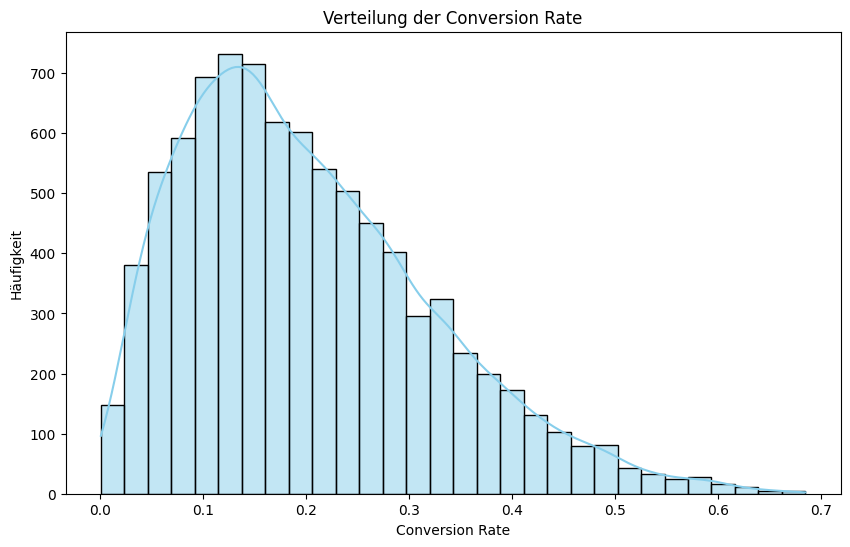

In [161]:
import seaborn as sns

def visualize_conversion_rate(grouped_df):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.histplot(df['ConversionRate'], bins=30, kde=True, color='skyblue')
    plt.title('Verteilung der Conversion Rate')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Häufigkeit')
    plt.show()

# Aufruf der Funktion
visualize_conversion_rate(grouped_df)

Boxplot der 'ConversionRate' mit 'Gender', 'GroupedAge' und 'CampaignChannel'

C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\3441669126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=grouped_df[col], y=grouped_df['ConversionRate'], palette='coolwarm')
C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\3441669126.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = grouped_df.groupby(col)['ConversionRate'].mean().reset_index()


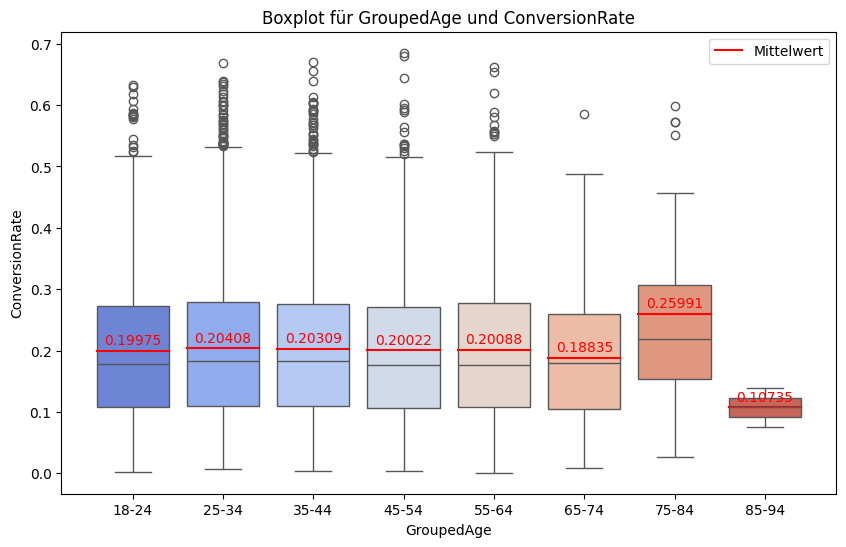

C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\3441669126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=grouped_df[col], y=grouped_df['ConversionRate'], palette='coolwarm')


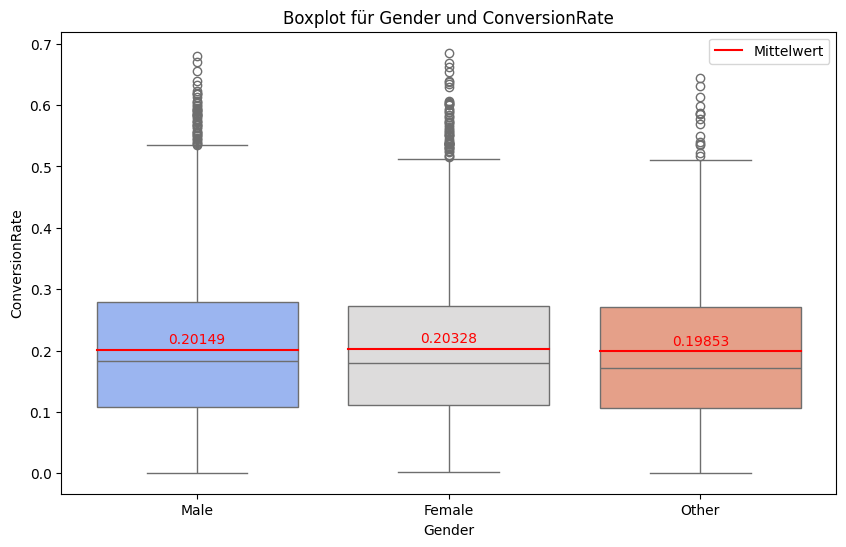

C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\3441669126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=grouped_df[col], y=grouped_df['ConversionRate'], palette='coolwarm')


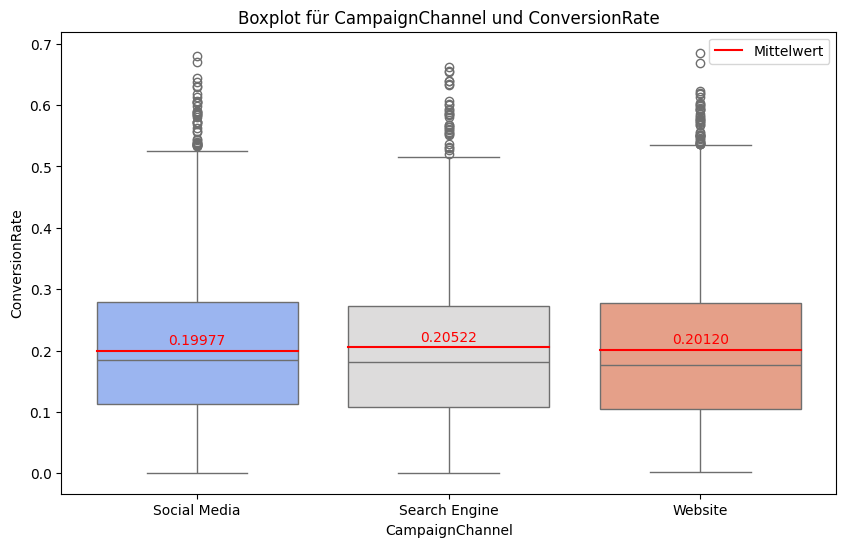

In [133]:
for col in grouped_df.columns:
    if col != 'ConversionRate':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=grouped_df[col], y=grouped_df['ConversionRate'], palette='coolwarm')
        
        # Mittelwert für jede Gruppe berechnen
        means = grouped_df.groupby(col)['ConversionRate'].mean().reset_index()
        
        # Mittelwertslinie hinzufügen
        for i, mean_value in means.iterrows():
            plt.plot([i - 0.4, i + 0.4], [mean_value['ConversionRate'], mean_value['ConversionRate']], 'r-', label='Mittelwert' if i == 0 else "")
            plt.text(i, mean_value['ConversionRate'] + 0.01, f'{mean_value["ConversionRate"]:.5f}', color='red', ha='center')
        
        plt.title(f'Boxplot für {col} und ConversionRate')
        plt.xticks(ha='center')
        plt.legend(loc='upper right')
        plt.show()

Durchschnittliche Conversionrate nach 'CampaignChannel' und 'Gender'

C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\1461296431.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_conversion_rates = df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].mean().reset_index()
C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\1461296431.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_conversion_rates, x='CampaignChannel', y='ConversionRate', hue='Gender', ci=None, palette='coolwarm')


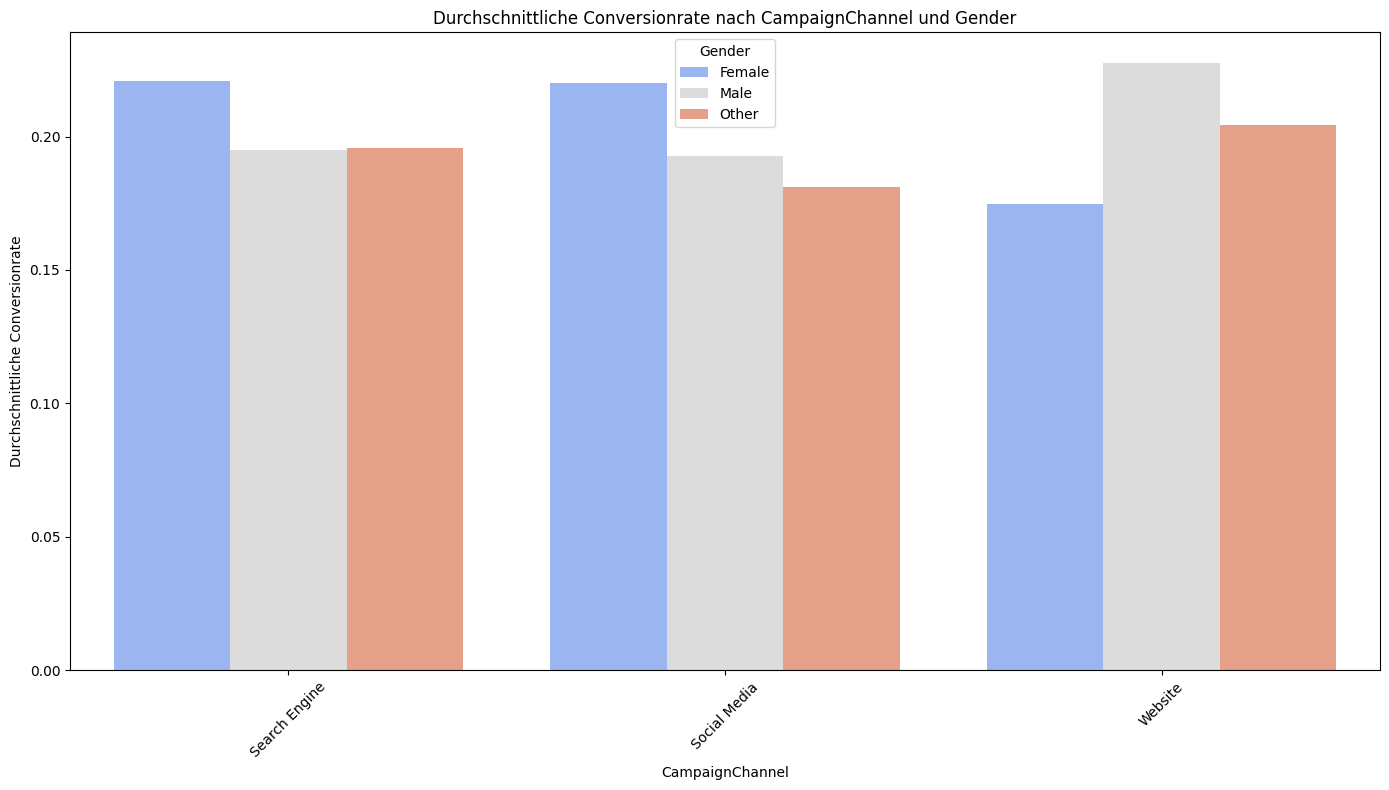

In [159]:
def visualize_conversion_rate(df):
    import matplotlib.pyplot as plt

    # Berechnung der durchschnittlichen Conversionrate für jede Kombination
    mean_conversion_rates = df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].mean().reset_index()

    # Visualisierung der Conversionrate
    plt.figure(figsize=(14, 8))
    sns.barplot(data=mean_conversion_rates, x='CampaignChannel', y='ConversionRate', hue='Gender', ci=None, palette='coolwarm')
    plt.title('Durchschnittliche Conversionrate nach CampaignChannel und Gender')
    plt.xlabel('CampaignChannel')
    plt.ylabel('Durchschnittliche Conversionrate')
    plt.legend(title='Gender')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Aufruf der Funktion
visualize_conversion_rate(df)

Durchschnittliche Conversionrate für jede Mögliche Kombination von 'Gender', 'GroupedAge' und 'CampaignChannel'

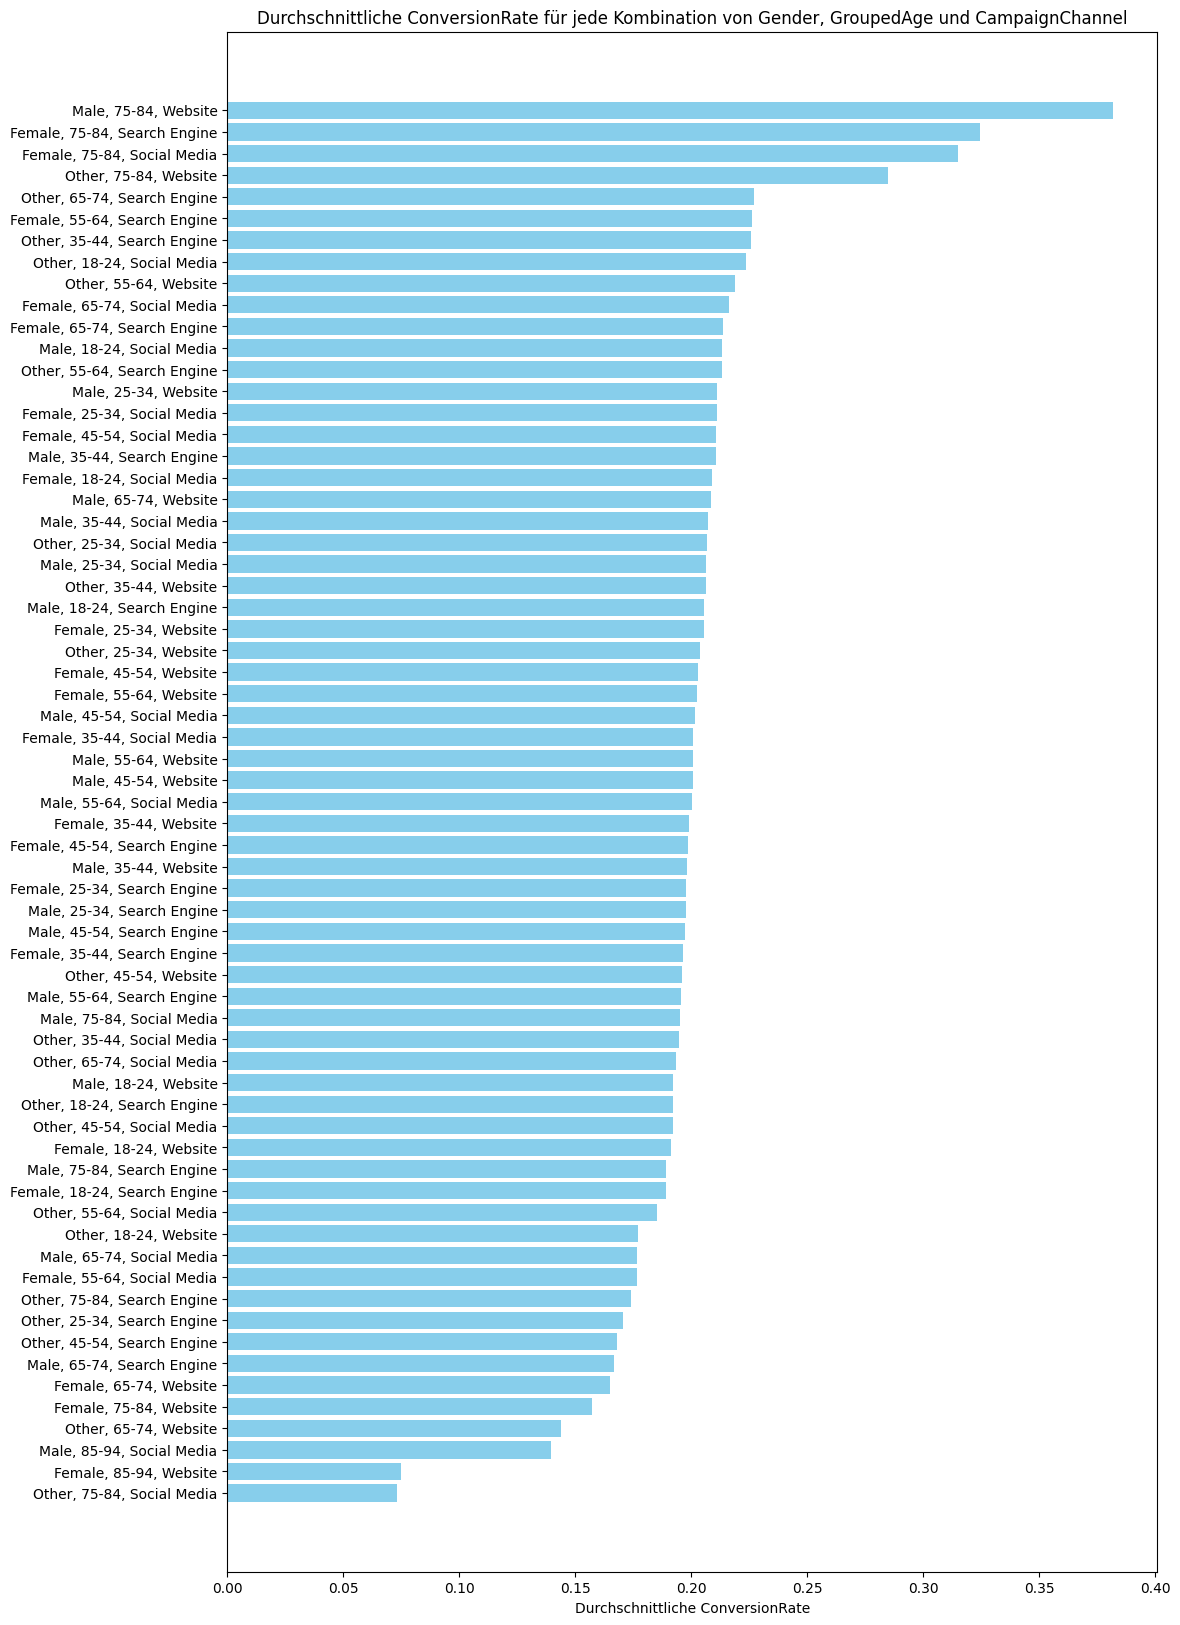

In [134]:
import matplotlib.pyplot as plt

# Zufällige Kombination auswählen
unique_combinations = grouped_df[['Gender', 'GroupedAge', 'CampaignChannel']].drop_duplicates()
statistics = []

for _, random_combination in unique_combinations.iterrows():
    # Kombination in den Testdaten sicherstellen
    test_data = grouped_df[(grouped_df['Gender'] == random_combination['Gender']) &
                           (grouped_df['GroupedAge'] == random_combination['GroupedAge']) &
                           (grouped_df['CampaignChannel'] == random_combination['CampaignChannel'])]

    test_statistic = test_data['ConversionRate'].mean()
    statistics.append((f"{random_combination['Gender']}, {random_combination['GroupedAge']}, {random_combination['CampaignChannel']}", test_statistic))

# Sortieren der Statistiken nach den Werten
statistics.sort(key=lambda x: x[1])

# Extrahieren der Labels und Werte
labels, values = zip(*statistics)

# Balkendiagramm erstellen
plt.figure(figsize=(12, 20))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Durchschnittliche ConversionRate')
plt.title('Durchschnittliche ConversionRate für jede Kombination von Gender, GroupedAge und CampaignChannel')
plt.show()


Naives Modell: Ausgabe des Durchschnitts

In [143]:
# Mittelwert der ConversionRate berechnen
mean_conversion_rate = y.mean()

# Naives Modell: Vorhersage ist immer der Mittelwert
y_pred_naive = np.full_like(y_test, mean_conversion_rate, dtype=np.float64)

# Fehlerberechnung
mse_naive = mean_squared_error(y_test, y_pred_naive)
mae_naive = mean_absolute_error(y_test, y_pred_naive)
rmse_naive = np.sqrt(mse_naive)

print(f'Naives Modell - Mean Conversion Rate: {mean_conversion_rate}')
print(f'Naives Modell - Mean Squared Error (MSE): {mse_naive}')
print(f'Naives Modell - Mean Absolute Error (MAE): {mae_naive}')
print(f'Naives Modell - Root Mean Squared Error (RMSE): {rmse_naive}')

Naives Modell - Mean Conversion Rate: 0.20206636760984586
Naives Modell - Mean Squared Error (MSE): 0.014965518163732571
Naives Modell - Mean Absolute Error (MAE): 0.09811950967751153
Naives Modell - Root Mean Squared Error (RMSE): 0.12233363463795463


Modellentwicklung: Neuronales Netz

In [136]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

test_predictions = []
test_statistics = []

# Zufällige Kombination auswählen
unique_combinations = grouped_df[['Gender', 'GroupedAge', 'CampaignChannel']].drop_duplicates()
for _, random_combination in unique_combinations.iterrows():
    # Kombination in den Testdaten sicherstellen
    test_data = grouped_df[(grouped_df['Gender'] == random_combination['Gender']) &
                           (grouped_df['GroupedAge'] == random_combination['GroupedAge']) &
                           (grouped_df['CampaignChannel'] == random_combination['CampaignChannel'])]

    # Restliche Daten als Trainingsdaten
    train_data = grouped_df.drop(test_data.index)

    # Test- und Trainingsdaten anzeigen
    #print("Trainingsdaten:")

    #print("\nTestdaten:")

    #print("\nAusgewählte Kombination:")
    #print(random_combination)

    # Beispieldaten
    test = { 
        'GroupedAge': [random_combination['GroupedAge']],
        'Gender': [random_combination['Gender']],
        'CampaignChannel': [random_combination['CampaignChannel']]
    }
    test_df = pd.DataFrame(test)

    # Daten vorbereiten
    X = train_data[['GroupedAge', 'Gender', 'CampaignChannel']]
    y = train_data['ConversionRate']

    # Kategorische Daten kodieren
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X[['GroupedAge', 'Gender', 'CampaignChannel']])
    test_encoded = encoder.transform(test_df[['GroupedAge', 'Gender', 'CampaignChannel']])

    X_encoded_dense = X_encoded.toarray()  # Convert sparse matrix to dense
    test_encoded_dense = test_encoded.toarray()

    #print(X_encoded_dense.shape)

    # Trainings- und Testdaten aufteilen
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Modell erstellen
    model = Sequential()
    model.add(Dense(10, input_dim=X_encoded.shape[1], activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Modell kompilieren
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Modell trainieren
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # Vorhersagen auf den Testdaten
    y_pred = model.predict(X_test)
    test_pred = model.predict(test_encoded)

    # Modell evaluieren
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error: {rmse}')

    print(f'Vorhersage für Beispieldaten: {test_pred}')

    test_statistic = test_data['ConversionRate'].mean()
    print(f'Statistischer Wert für Beispieldaten: {test_statistic}')
    test_predictions.append(test_pred.flatten()[0])
    test_statistics.append(test_statistic)  

# Mean Absolute Error zwischen allen test_pred und test_statistic berechnen
mean_error = np.mean(np.abs(np.array(test_predictions) - np.array(test_statistics)))
print(f'Mean Absolute Error zwischen test_pred und test_statistic: {mean_error}')



c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0434 - val_loss: 0.0187
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181 - val_loss: 0.0158
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - val_loss: 0.0152
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0150
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0149
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0146
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - val_loss: 0.0147
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 9/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - val_loss: 0.0147
Epoch 10/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - val_loss: 0.0147
Epoch 11/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - val_loss: 0.0145
Epoch 12/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1015 - val_loss: 0.0293
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0240 - val_loss: 0.0164
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - val_loss: 0.0151
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - val_loss: 0.0146
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0143
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - val_loss: 0.0141
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - val_loss: 0.0140
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0160 - val_loss: 0.0140
Epoch 9/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0139
Epoch 10/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0153 - val_loss: 0.0140
Epoch 11/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0139
Epoch 12/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1202 - val_loss: 0.0267
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0240 - val_loss: 0.0183
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172 - val_loss: 0.0165
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159 - val_loss: 0.0160
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - val_loss: 0.0158
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0156
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - val_loss: 0.0156
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - val_loss: 0.0155
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - val_loss: 0.0154
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0154
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0154
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0591 - val_loss: 0.0197
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - val_loss: 0.0159
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0160 - val_loss: 0.0150
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - val_loss: 0.0146
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0150 - val_loss: 0.0145
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0145
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - val_loss: 0.0144
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0144
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0147 - val_loss: 0.0142
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - val_loss: 0.0142
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - val_loss: 0.0143
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1940 - val_loss: 0.0351
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0287 - val_loss: 0.0196
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184 - val_loss: 0.0171
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - val_loss: 0.0162
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0153
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0145 - val_loss: 0.0154
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 9/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - val_loss: 0.0152
Epoch 10/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - val_loss: 0.0150
Epoch 11/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - val_loss: 0.0149
Epoch 12/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1829 - val_loss: 0.0324
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0291 - val_loss: 0.0193
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - val_loss: 0.0168
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181 - val_loss: 0.0159
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0166 - val_loss: 0.0151
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0161 - val_loss: 0.0148
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0146
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - val_loss: 0.0143
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - val_loss: 0.0142
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0142
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0141
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1673 - val_loss: 0.0475
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0398 - val_loss: 0.0234
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0220 - val_loss: 0.0181
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0183 - val_loss: 0.0164
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0164 - val_loss: 0.0158
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - val_loss: 0.0155
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - val_loss: 0.0152
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - val_loss: 0.0151
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0150
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - val_loss: 0.0148
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - val_loss: 0.0148
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1371 - val_loss: 0.0328
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0303 - val_loss: 0.0194
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0198 - val_loss: 0.0172
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181 - val_loss: 0.0165
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - val_loss: 0.0158
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0168 - val_loss: 0.0156
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - val_loss: 0.0153
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - val_loss: 0.0154
Epoch 9/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 10/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - val_loss: 0.0150
Epoch 11/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0149
Epoch 12/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.5582 - val_loss: 0.0451
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0368 - val_loss: 0.0187
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192 - val_loss: 0.0162
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173 - val_loss: 0.0155
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0161 - val_loss: 0.0152
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - val_loss: 0.0150
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - val_loss: 0.0148
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - val_loss: 0.0147
Epoch 9/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159 - val_loss: 0.0148
Epoch 10/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0146
Epoch 11/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0155 - val_loss: 0.0146
Epoch 12/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2489 - val_loss: 0.0580
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0454 - val_loss: 0.0255
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228 - val_loss: 0.0191
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189 - val_loss: 0.0173
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172 - val_loss: 0.0167
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - val_loss: 0.0164
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - val_loss: 0.0161
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0159
Epoch 9/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - val_loss: 0.0157
Epoch 10/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0157
Epoch 11/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0150 - val_loss: 0.0156
Epoch 12/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/st

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0511 - val_loss: 0.0186
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178 - val_loss: 0.0156
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0166 - val_loss: 0.0150
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0147
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - val_loss: 0.0146
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - val_loss: 0.0147
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0145
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - val_loss: 0.0144
Epoch 9/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - val_loss: 0.0145
Epoch 10/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - val_loss: 0.0145
Epoch 11/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 12/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1000 - val_loss: 0.0285
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0263 - val_loss: 0.0217
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199 - val_loss: 0.0187
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182 - val_loss: 0.0172
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0161 - val_loss: 0.0166
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - val_loss: 0.0165
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0161
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0161
Epoch 10/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0161
Epoch 11/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - val_loss: 0.0158
Epoch 12/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1339 - val_loss: 0.0262
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0233 - val_loss: 0.0179
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173 - val_loss: 0.0167
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0159 - val_loss: 0.0162
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - val_loss: 0.0159
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0157
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - val_loss: 0.0158
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0153 - val_loss: 0.0156
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0151 - val_loss: 0.0156
Epoch 10/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - val_loss: 0.0157
Epoch 11/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0143 - val_loss: 0.0155
Epoch 12/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/st

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1315 - val_loss: 0.0312
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0243 - val_loss: 0.0189
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173 - val_loss: 0.0166
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0163 - val_loss: 0.0158
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0154
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - val_loss: 0.0153
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - val_loss: 0.0150
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - val_loss: 0.0151
Epoch 10/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0150
Epoch 11/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0146 - val_loss: 0.0149
Epoch 12/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0724 - val_loss: 0.0213
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0196 - val_loss: 0.0157
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - val_loss: 0.0147
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - val_loss: 0.0144
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0158 - val_loss: 0.0144
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0142
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0143
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - val_loss: 0.0142
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - val_loss: 0.0143
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - val_loss: 0.0145
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - val_loss: 0.0141
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3090 - val_loss: 0.0392
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0335 - val_loss: 0.0212
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203 - val_loss: 0.0183
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - val_loss: 0.0169
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - val_loss: 0.0162
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - val_loss: 0.0159
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0154
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0154
Epoch 9/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - val_loss: 0.0152
Epoch 10/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0150
Epoch 11/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0150
Epoch 12/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1197 - val_loss: 0.0224
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191 - val_loss: 0.0179
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168 - val_loss: 0.0169
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - val_loss: 0.0164
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - val_loss: 0.0163
Epoch 6/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0161
Epoch 7/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0160
Epoch 8/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0160
Epoch 9/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - val_loss: 0.0160
Epoch 10/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - val_loss: 0.0159
Epoch 11/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0159
Epoch 12/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3355 - val_loss: 0.0439
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0353 - val_loss: 0.0207
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - val_loss: 0.0171
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - val_loss: 0.0160
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0172 - val_loss: 0.0155
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - val_loss: 0.0152
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - val_loss: 0.0153
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - val_loss: 0.0148
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - val_loss: 0.0148
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0615 - val_loss: 0.0224
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0202 - val_loss: 0.0173
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172 - val_loss: 0.0159
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0153
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0150
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - val_loss: 0.0151
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 9/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - val_loss: 0.0147
Epoch 10/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - val_loss: 0.0147
Epoch 11/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 12/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1612 - val_loss: 0.0307
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0259 - val_loss: 0.0207
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0175 - val_loss: 0.0163
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0166 - val_loss: 0.0155
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - val_loss: 0.0152
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - val_loss: 0.0149
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0147
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 10/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 11/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - val_loss: 0.0145
Epoch 12/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1917 - val_loss: 0.0461
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0394 - val_loss: 0.0215
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0212 - val_loss: 0.0168
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0172 - val_loss: 0.0153
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - val_loss: 0.0147
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0158 - val_loss: 0.0146
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - val_loss: 0.0144
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - val_loss: 0.0142
Epoch 9/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0142
Epoch 10/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - val_loss: 0.0142
Epoch 11/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - val_loss: 0.0141
Epoch 12/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0786 - val_loss: 0.0227
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0210 - val_loss: 0.0175
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174 - val_loss: 0.0160
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - val_loss: 0.0156
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - val_loss: 0.0152
Epoch 6/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - val_loss: 0.0152
Epoch 7/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0152
Epoch 8/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - val_loss: 0.0151
Epoch 9/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - val_loss: 0.0150
Epoch 10/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 11/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0151
Epoch 12/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1269 - val_loss: 0.0213
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0214 - val_loss: 0.0171
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181 - val_loss: 0.0159
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - val_loss: 0.0153
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0161 - val_loss: 0.0149
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0158 - val_loss: 0.0147
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0160 - val_loss: 0.0145
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0143
Epoch 10/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - val_loss: 0.0143
Epoch 11/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0153 - val_loss: 0.0143
Epoch 12/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0993 - val_loss: 0.0236
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0205 - val_loss: 0.0175
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165 - val_loss: 0.0164
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0161
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0158
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - val_loss: 0.0158
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - val_loss: 0.0156
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - val_loss: 0.0155
Epoch 9/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0155
Epoch 10/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - val_loss: 0.0154
Epoch 11/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0148 - val_loss: 0.0155
Epoch 12/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1099 - val_loss: 0.0226
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0203 - val_loss: 0.0187
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - val_loss: 0.0173
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - val_loss: 0.0165
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - val_loss: 0.0162
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0160
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - val_loss: 0.0160
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0158
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - val_loss: 0.0158
Epoch 10/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - val_loss: 0.0160
Epoch 11/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0149 - val_loss: 0.0156
Epoch 12/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1028 - val_loss: 0.0227
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0212 - val_loss: 0.0190
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168 - val_loss: 0.0176
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0164 - val_loss: 0.0169
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - val_loss: 0.0163
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - val_loss: 0.0160
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - val_loss: 0.0160
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0145 - val_loss: 0.0160
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0160
Epoch 10/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - val_loss: 0.0159
Epoch 11/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - val_loss: 0.0158
Epoch 12/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1712 - val_loss: 0.0266
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0233 - val_loss: 0.0197
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0175 - val_loss: 0.0165
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165 - val_loss: 0.0158
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - val_loss: 0.0154
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0157 - val_loss: 0.0152
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - val_loss: 0.0150
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0149
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0156 - val_loss: 0.0149
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0793 - val_loss: 0.0236
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203 - val_loss: 0.0190
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - val_loss: 0.0174
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - val_loss: 0.0169
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - val_loss: 0.0167
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165 - val_loss: 0.0167
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - val_loss: 0.0169
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - val_loss: 0.0161
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0159
Epoch 10/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0160
Epoch 11/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0167
Epoch 12/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0816 - val_loss: 0.0260
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - val_loss: 0.0172
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - val_loss: 0.0157
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - val_loss: 0.0155
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0154 - val_loss: 0.0153
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - val_loss: 0.0155
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - val_loss: 0.0151
Epoch 9/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 10/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - val_loss: 0.0151
Epoch 11/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - val_loss: 0.0151
Epoch 12/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0635 - val_loss: 0.0204
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0196 - val_loss: 0.0170
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0171 - val_loss: 0.0163
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0159
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - val_loss: 0.0157
Epoch 6/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 7/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0154
Epoch 8/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0155 - val_loss: 0.0154
Epoch 9/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0153
Epoch 10/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0154
Epoch 11/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0153
Epoch 12/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3928 - val_loss: 0.0496
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0420 - val_loss: 0.0255
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0241 - val_loss: 0.0202
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0206 - val_loss: 0.0184
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179 - val_loss: 0.0173
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0170 - val_loss: 0.0167
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0164 - val_loss: 0.0162
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0164 - val_loss: 0.0160
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0158
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0157
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0156
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0634 - val_loss: 0.0249
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0201 - val_loss: 0.0181
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162 - val_loss: 0.0168
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - val_loss: 0.0165
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0161
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0150 - val_loss: 0.0164
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0151 - val_loss: 0.0161
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0153 - val_loss: 0.0160
Epoch 9/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0147 - val_loss: 0.0159
Epoch 10/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0159
Epoch 11/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0146 - val_loss: 0.0159
Epoch 12/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0700 - val_loss: 0.0211
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0215 - val_loss: 0.0169
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0170 - val_loss: 0.0157
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0164 - val_loss: 0.0152
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0148
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - val_loss: 0.0148
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0157 - val_loss: 0.0147
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0146
Epoch 9/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0146
Epoch 10/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0150 - val_loss: 0.0146
Epoch 11/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0145 - val_loss: 0.0148
Epoch 12/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0561 - val_loss: 0.0194
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177 - val_loss: 0.0170
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0166
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0164
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0162
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0163
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0160
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0161
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0162
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0162
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0162
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0659 - val_loss: 0.0231
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0217 - val_loss: 0.0168
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171 - val_loss: 0.0157
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0162 - val_loss: 0.0154
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0151 - val_loss: 0.0154
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0155 - val_loss: 0.0153
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0149 - val_loss: 0.0152
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0148 - val_loss: 0.0154
Epoch 9/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0151 - val_loss: 0.0151
Epoch 10/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0153 - val_loss: 0.0151
Epoch 11/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 12/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0516 - val_loss: 0.0222
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0191 - val_loss: 0.0179
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - val_loss: 0.0168
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0158 - val_loss: 0.0162
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0159
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0157
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0156
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0156
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0142 - val_loss: 0.0156
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0156
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0155
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1136 - val_loss: 0.0219
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0191 - val_loss: 0.0172
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - val_loss: 0.0162
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0158
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0158
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0153
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0153
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - val_loss: 0.0153
Epoch 10/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0152
Epoch 11/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0155
Epoch 12/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1683 - val_loss: 0.0330
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0299 - val_loss: 0.0216
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0211 - val_loss: 0.0179
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0186 - val_loss: 0.0160
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0165 - val_loss: 0.0150
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162 - val_loss: 0.0146
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - val_loss: 0.0142
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0158 - val_loss: 0.0141
Epoch 9/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0141
Epoch 10/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0141
Epoch 11/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0141
Epoch 12/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2871 - val_loss: 0.0388
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0314 - val_loss: 0.0211
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0208 - val_loss: 0.0186
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177 - val_loss: 0.0174
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0172 - val_loss: 0.0168
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - val_loss: 0.0165
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0162
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0157 - val_loss: 0.0161
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0159
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - val_loss: 0.0159
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0158
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0686 - val_loss: 0.0217
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187 - val_loss: 0.0173
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - val_loss: 0.0163
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0157
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0156
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0155
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0151 - val_loss: 0.0154
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0147 - val_loss: 0.0153
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - val_loss: 0.0153
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - val_loss: 0.0154
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - val_loss: 0.0152
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0486 - val_loss: 0.0216
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0201 - val_loss: 0.0167
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0165 - val_loss: 0.0152
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0148
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0145
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0145
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0144
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0144 - val_loss: 0.0143
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0144
Epoch 10/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0143
Epoch 11/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0143
Epoch 12/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1418 - val_loss: 0.0235
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0211 - val_loss: 0.0169
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - val_loss: 0.0157
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - val_loss: 0.0151
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0149
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0149
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0149
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0144 - val_loss: 0.0149
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - val_loss: 0.0148
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0844 - val_loss: 0.0174
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0165 - val_loss: 0.0151
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0152 - val_loss: 0.0149
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0148
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0149
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0148
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0148 - val_loss: 0.0148
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0149 - val_loss: 0.0148
Epoch 9/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0149
Epoch 10/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0151
Epoch 11/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0150
Epoch 12/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0751 - val_loss: 0.0216
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188 - val_loss: 0.0171
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0164 - val_loss: 0.0162
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0159 - val_loss: 0.0159
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0149 - val_loss: 0.0158
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - val_loss: 0.0159
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0157
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0156
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0149 - val_loss: 0.0157
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0156
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0142 - val_loss: 0.0156
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1534 - val_loss: 0.0290
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0282 - val_loss: 0.0212
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - val_loss: 0.0181
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182 - val_loss: 0.0169
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0168 - val_loss: 0.0160
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - val_loss: 0.0155
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0151
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0153
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0155 - val_loss: 0.0149
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0148 - val_loss: 0.0149
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0149
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0306 - val_loss: 0.0172
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0160 - val_loss: 0.0162
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162 - val_loss: 0.0158
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - val_loss: 0.0156
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0156
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0148 - val_loss: 0.0155
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0154
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - val_loss: 0.0153
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0153
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0143 - val_loss: 0.0154
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0153
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0996 - val_loss: 0.0216
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0211 - val_loss: 0.0166
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0173 - val_loss: 0.0153
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - val_loss: 0.0148
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0146
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0148 - val_loss: 0.0144
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0141 - val_loss: 0.0145
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0145
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - val_loss: 0.0145
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0146
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0147 - val_loss: 0.0151
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0603 - val_loss: 0.0236
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0209 - val_loss: 0.0186
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0178 - val_loss: 0.0171
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - val_loss: 0.0165
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0156 - val_loss: 0.0164
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - val_loss: 0.0158
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0153 - val_loss: 0.0156
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0159
Epoch 9/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0156
Epoch 10/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0155
Epoch 11/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0155
Epoch 12/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1126 - val_loss: 0.0216
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0198 - val_loss: 0.0156
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0165 - val_loss: 0.0144
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0141
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0139
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - val_loss: 0.0140
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0139
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0138
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0139
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0138
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0764 - val_loss: 0.0225
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194 - val_loss: 0.0174
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0173 - val_loss: 0.0160
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0170 - val_loss: 0.0155
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0156 - val_loss: 0.0151
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - val_loss: 0.0149
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0147
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0156 - val_loss: 0.0147
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0153 - val_loss: 0.0146
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0156 - val_loss: 0.0144
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0147
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0628 - val_loss: 0.0247
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0215 - val_loss: 0.0184
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0182 - val_loss: 0.0167
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0163 - val_loss: 0.0158
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0163 - val_loss: 0.0155
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - val_loss: 0.0152
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0151
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0148
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0149
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0816 - val_loss: 0.0261
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0226 - val_loss: 0.0197
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179 - val_loss: 0.0176
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0160 - val_loss: 0.0167
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0164
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0160
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - val_loss: 0.0159
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0159
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0159
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0150 - val_loss: 0.0159
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0157
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2570 - val_loss: 0.0544
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0436 - val_loss: 0.0281
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0264 - val_loss: 0.0204
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199 - val_loss: 0.0174
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0180 - val_loss: 0.0159
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0166 - val_loss: 0.0155
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0158 - val_loss: 0.0147
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0146
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0144
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0141
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0141
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0521 - val_loss: 0.0179
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0166 - val_loss: 0.0159
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0158
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0155
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0153 - val_loss: 0.0154
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - val_loss: 0.0156
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0148 - val_loss: 0.0153
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - val_loss: 0.0153
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - val_loss: 0.0153
Epoch 10/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0147 - val_loss: 0.0155
Epoch 11/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0143 - val_loss: 0.0154
Epoch 12/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0704 - val_loss: 0.0215
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0199 - val_loss: 0.0171
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - val_loss: 0.0159
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0158 - val_loss: 0.0154
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - val_loss: 0.0153
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0151
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0149
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0144 - val_loss: 0.0149
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0144 - val_loss: 0.0151
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0148
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - val_loss: 0.0148
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0778 - val_loss: 0.0236
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0224 - val_loss: 0.0168
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176 - val_loss: 0.0152
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - val_loss: 0.0147
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0155 - val_loss: 0.0146
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0141
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0142
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0141
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0146 - val_loss: 0.0140
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0140
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0139
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0316 - val_loss: 0.0161
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0159 - val_loss: 0.0145
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0143
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - val_loss: 0.0141
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0144 - val_loss: 0.0141
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - val_loss: 0.0138
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0138
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0138
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0137
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0138
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0757 - val_loss: 0.0245
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0205 - val_loss: 0.0173
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0160 - val_loss: 0.0158
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0158 - val_loss: 0.0153
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0151
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0152
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - val_loss: 0.0150
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0144 - val_loss: 0.0148
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - val_loss: 0.0149
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0148
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0141 - val_loss: 0.0148
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0641 - val_loss: 0.0235
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0212 - val_loss: 0.0180
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0176 - val_loss: 0.0163
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - val_loss: 0.0161
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0154 - val_loss: 0.0155
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - val_loss: 0.0155
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - val_loss: 0.0155
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - val_loss: 0.0153
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - val_loss: 0.0167
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0153
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0154
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/st

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3490 - val_loss: 0.0411
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0345 - val_loss: 0.0219
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0225 - val_loss: 0.0189
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188 - val_loss: 0.0174
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182 - val_loss: 0.0167
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0181 - val_loss: 0.0160
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162 - val_loss: 0.0159
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - val_loss: 0.0153
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0161 - val_loss: 0.0151
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0150
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0150
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0992 - val_loss: 0.0225
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0210 - val_loss: 0.0168
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168 - val_loss: 0.0156
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0149
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0146
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - val_loss: 0.0143
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0143
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0149 - val_loss: 0.0142
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0151 - val_loss: 0.0141
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - val_loss: 0.0141
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0142
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0478 - val_loss: 0.0176
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0169 - val_loss: 0.0153
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0161 - val_loss: 0.0148
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0152 - val_loss: 0.0146
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0147
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0144 - val_loss: 0.0145
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0144
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0141 - val_loss: 0.0143
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0142 - val_loss: 0.0144
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1792 - val_loss: 0.0256
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0223 - val_loss: 0.0182
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175 - val_loss: 0.0162
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162 - val_loss: 0.0155
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0164 - val_loss: 0.0151
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0154 - val_loss: 0.0149
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0149
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0149
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0147 - val_loss: 0.0149
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - val_loss: 0.0149
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4897 - val_loss: 0.0529
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0397 - val_loss: 0.0234
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0215 - val_loss: 0.0188
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0186 - val_loss: 0.0171
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0175 - val_loss: 0.0164
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0167 - val_loss: 0.0156
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0164 - val_loss: 0.0151
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0160 - val_loss: 0.0149
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - val_loss: 0.0148
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0146
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1455 - val_loss: 0.0258
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - val_loss: 0.0178
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - val_loss: 0.0159
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166 - val_loss: 0.0153
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - val_loss: 0.0149
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - val_loss: 0.0145
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - val_loss: 0.0142
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - val_loss: 0.0140
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - val_loss: 0.0140
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - val_loss: 0.0139
Epoch 12/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Modellentwicklung: XGBoost

In [149]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

test_predictions = []
test_statistics = []
mse_values = []
mae_values = []
rmse_values = []

# Zufällige Kombination auswählen
unique_combinations = grouped_df[['Gender', 'GroupedAge', 'CampaignChannel']].drop_duplicates()
for _, random_combination in unique_combinations.iterrows():
    # Kombination in den Testdaten sicherstellen
    test_data = grouped_df[(grouped_df['Gender'] == random_combination['Gender']) &
                           (grouped_df['GroupedAge'] == random_combination['GroupedAge']) &
                           (grouped_df['CampaignChannel'] == random_combination['CampaignChannel'])]

    # Restliche Daten als Trainingsdaten
    train_data = grouped_df.drop(test_data.index)

    # Test- und Trainingsdaten anzeigen
    print("Trainingsdaten:")

    print("\nTestdaten:")

    print("\nAusgewählte Kombination:")
    print(random_combination)

    # Beispieldaten
    test = { 
        'GroupedAge': [random_combination['GroupedAge']],
        'Gender': [random_combination['Gender']],
        'CampaignChannel': [random_combination['CampaignChannel']]
    }
    test_df = pd.DataFrame(test)

    # Daten vorbereiten
    X = grouped_df[['GroupedAge', 'Gender', 'CampaignChannel']]
    y = grouped_df['ConversionRate']

    # Kategorische Daten kodieren
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X)
    test_encoded = encoder.transform(test_df)

    # Trainings- und Testdaten aufteilen
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # XGBoost Modell erstellen
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train, y_train)

    # Vorhersagen auf den Testdaten
    y_pred = xgb_model.predict(X_test)
    test_pred = xgb_model.predict(test_encoded)

    # Modell evaluieren
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    
    print(f'Vorhersage für Beispieldaten: {test_pred[0]}')
    
    test_statistic = test_data['ConversionRate'].mean()
    print(f'Statistischer Wert für Beispieldaten: {test_statistic}')
    test_predictions.append(test_pred.flatten()[0])
    test_statistics.append(test_statistic)
    mse_values.append(mse)
    mae_values.append(mae)
    rmse_values.append(rmse)

# Mean Absolute Error zwischen allen test_pred und test_statistic berechnen
mean_error = np.mean(np.abs(np.array(test_predictions) - np.array(test_statistics)))
print(f'Mean Absolute Error zwischen test_pred und test_statistic: {mean_error}')

# Durchschnittliche Werte für mse, mae und rmse berechnen
average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)
average_rmse = np.mean(rmse_values)

print(f'Durchschnittlicher Mean Squared Error (MSE): {average_mse}')
print(f'Durchschnittlicher Mean Absolute Error (MAE): {average_mae}')
print(f'Durchschnittlicher Root Mean Squared Error (RMSE): {average_rmse}')

# Berechnung der Standardabweichung für jede Kombination
std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()

# Berechnung des Durchschnitts der Standardabweichungen jeder Kombination
average_std_dev = std_devs['ConversionRate'].mean()

print(f'Durchschnittliche Standardabweichung jeder möglichen Kombination von ConversionRate: {average_std_dev}')

# Berechnung des Anteils von MAE und RMSE in Prozent
mae_percentage = (average_mae / average_std_dev) * 100
rmse_percentage = (average_rmse / average_std_dev) * 100

print(f'MAE als Prozentsatz von average_std_dev: {mae_percentage:.2f}%')
print(f'RMSE als Prozentsatz von average_std_dev: {rmse_percentage:.2f}%')

Trainingsdaten:

Testdaten:

Ausgewählte Kombination:
Gender                     Male
GroupedAge                55-64
CampaignChannel    Social Media
Name: 0, dtype: object
Mean Absolute Error: 0.09829068853735856
Mean Squared Error: 0.014991922469998375
Root Mean Squared Error: 0.12244150632035844
Vorhersage für Beispieldaten: 0.1981753259897232
Statistischer Wert für Beispieldaten: 0.20031651376146786
Trainingsdaten:

Testdaten:

Ausgewählte Kombination:
Gender                      Male
GroupedAge                 35-44
CampaignChannel    Search Engine
Name: 1, dtype: object
Mean Absolute Error: 0.09829068853735856
Mean Squared Error: 0.014991922469998375
Root Mean Squared Error: 0.12244150632035844
Vorhersage für Beispieldaten: 0.2090574949979782
Statistischer Wert für Beispieldaten: 0.21063080684596577
Trainingsdaten:

Testdaten:

Ausgewählte Kombination:
Gender                   Female
GroupedAge                45-54
CampaignChannel    Social Media
Name: 2, dtype: object
Mean Absol

C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\1125024792.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()


XGBoost Hyper Parameter Tuning 

In [158]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

test_predictions = []
test_statistics = []
mse_values = []
mae_values = []
rmse_values = []

# Zufällige Kombination auswählen
unique_combinations = grouped_df[['Gender', 'GroupedAge', 'CampaignChannel']].drop_duplicates()
for _, random_combination in unique_combinations.iterrows():
    # Kombination in den Testdaten sicherstellen
    test_data = grouped_df[(grouped_df['Gender'] == random_combination['Gender']) &
                           (grouped_df['GroupedAge'] == random_combination['GroupedAge']) &
                           (grouped_df['CampaignChannel'] == random_combination['CampaignChannel'])]

    # Restliche Daten als Trainingsdaten
    train_data = grouped_df.drop(test_data.index)

    # Test- und Trainingsdaten anzeigen
    print("Trainingsdaten:")

    print("\nTestdaten:")

    print("\nAusgewählte Kombination:")
    print(random_combination)

    # Beispieldaten
    test = { 
        'GroupedAge': [random_combination['GroupedAge']],
        'Gender': [random_combination['Gender']],
        'CampaignChannel': [random_combination['CampaignChannel']]
    }
    test_df = pd.DataFrame(test)

    # Daten vorbereiten
    X = grouped_df[['GroupedAge', 'Gender', 'CampaignChannel']]
    y = grouped_df['ConversionRate']

    # Kategorische Daten kodieren
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X)
    test_encoded = encoder.transform(test_df)

    # Trainings- und Testdaten aufteilen
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

   # Hyperparameter-Tuning mit GridSearchCV
    param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'subsample': [0.8, 1.0]
    }
   
    # Gradient Boosting Modell erstellen
    gb_model = GradientBoostingRegressor(random_state=42)
    gb_model.fit(X_train, y_train)

    grid_search = GridSearchCV(
        estimator=gb_model,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Vorhersagen auf den Testdaten
    y_pred = best_model.predict(X_test)
    test_pred = best_model.predict(test_encoded)

    # Modell evaluieren
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    
    print(f'Vorhersage für Beispieldaten: {test_pred[0]}')
    
    test_statistic = test_data['ConversionRate'].mean()
    print(f'Statistischer Wert für Beispieldaten: {test_statistic}')
    test_predictions.append(test_pred.flatten()[0])
    test_statistics.append(test_statistic)
    mse_values.append(mse)
    mae_values.append(mae)
    rmse_values.append(rmse)

# Mean Absolute Error zwischen allen test_pred und test_statistic berechnen
mean_error = np.mean(np.abs(np.array(test_predictions) - np.array(test_statistics)))
print(f'Mean Absolute Error zwischen test_pred und test_statistic: {mean_error}')

# Durchschnittliche Werte für mse, mae und rmse berechnen
average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)
average_rmse = np.mean(rmse_values)

print(f'Durchschnittlicher Mean Squared Error (MSE): {average_mse}')
print(f'Durchschnittlicher Mean Absolute Error (MAE): {average_mae}')
print(f'Durchschnittlicher Root Mean Squared Error (RMSE): {average_rmse}')

# Berechnung der Standardabweichung für jede Kombination
std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()

# Berechnung des Durchschnitts der Standardabweichungen jeder Kombination
average_std_dev = std_devs['ConversionRate'].mean()

print(f'Durchschnittliche Standardabweichung jeder möglichen Kombination von ConversionRate: {average_std_dev}')

# Berechnung des Anteils von MAE und RMSE in Prozent
mae_percentage = (average_mae / average_std_dev) * 100
rmse_percentage = (average_rmse / average_std_dev) * 100

print(f'MAE als Prozentsatz von average_std_dev: {mae_percentage:.2f}%')
print(f'RMSE als Prozentsatz von average_std_dev: {rmse_percentage:.2f}%')

Trainingsdaten:

Testdaten:

Ausgewählte Kombination:
Gender                     Male
GroupedAge                55-64
CampaignChannel    Social Media
Name: 0, dtype: object
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Mean Absolute Error: 0.09813493089837949
Mean Squared Error: 0.01495619898969554
Root Mean Squared Error: 0.12229553953311437
Vorhersage für Beispieldaten: 0.20176148590445678
Statistischer Wert für Beispieldaten: 0.20031651376146786
Trainingsdaten:

Testdaten:

Ausgewählte Kombination:
Gender                      Male
GroupedAge                 35-44
CampaignChannel    Search Engine
Name: 1, dtype: object
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Mean Absolute Error: 0.09813493089837949
Mean Squared Error: 0.01495619898969554
Root Mean Squared Error: 0.12229553953311437
Vorhersage für Beispieldaten: 0.2029111918883919
Statistischer Wert für Beispieldaten: 0.21063080684596577
Trainingsdaten:

Testdaten:

Ausgewählte Kombination:
Gender

C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\2802258776.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()


Evaluierung der Modell Ergebnisse

In [140]:
def filter_and_calculate_stats(grouped_age, gender, campaign_channel):
    filtered_df = grouped_df[(grouped_df['GroupedAge'] == grouped_age) & 
                             (grouped_df['Gender'] == gender) & 
                             (grouped_df['CampaignChannel'] == campaign_channel)]
    
    mean_conversion_rate = filtered_df['ConversionRate'].mean()
    std_conversion_rate = filtered_df['ConversionRate'].std()
    
    return mean_conversion_rate, std_conversion_rate

# Beispielaufruf
grouped_age = '18-24'
gender = 'Male'
campaign_channel = 'Social Media'

mean_conversion_rate, std_conversion_rate = filter_and_calculate_stats(grouped_age, gender, campaign_channel)
print(f'Mean Conversion Rate: {mean_conversion_rate}')
print(f'Standardabweichung der Conversion Rate: {std_conversion_rate}')

Mean Conversion Rate: 0.21341463414634146
Standardabweichung der Conversion Rate: 0.12467843296872584


Durchschnittliche Standardabweicung der 'ConversionRate' für jede Kombination von 'Gender', 'GroupedAge' und 'CampaignChannel'

In [141]:
# Berechnung der Standardabweichung für jede Kombination
std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()

# Berechnung des Durchschnitts der Standardabweichungen
average_std_dev = std_devs['ConversionRate'].mean()

print(f'Durchschnittliche Standardabweichung von ConversionRate: {average_std_dev}')

Durchschnittliche Standardabweichung von ConversionRate: 0.12158614861013976


C:\Users\gabri\AppData\Local\Temp\ipykernel_24408\1535997134.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()


In [142]:
print("ENDE")

ENDE
